# Importing the necessary libraries

In [ ]:
import sys
import numpy
import pandas
import matplotlib
import seaborn
import scipy
import sklearn
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

print("python :{}".format(sys.version))
print("numpy :{}".format(numpy.__version__))
print("pandas :{}".format(pandas.__version__))
print("pmatplotlib :{}".format(matplotlib.__version__))
print("seaborn :{}".format(seaborn.__version__))
print("scipy :{}".format(scipy.__version__))
print("sklearn :{}".format(sklearn.__version__))


python :3.7.10 (default, May  3 2021, 02:48:31) 
[GCC 7.5.0]
numpy :1.19.5
pandas :1.1.5
pmatplotlib :3.2.2
seaborn :0.11.1
scipy :1.4.1
sklearn :0.22.2.post1


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from termcolor import colored

# Importing the DataSet

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/creditcard.csv")
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [ ]:
print(data.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [ ]:
data.info() # The count of each column is 284807 which suggests there are no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
print(data.describe()) 
# Min values of Time and Amount is 0 which indicates there are no negative values in Time and Amount columns 

                Time            V1  ...         Amount          Class
count  284807.000000  2.848070e+05  ...  284807.000000  284807.000000
mean    94813.859575  3.919560e-15  ...      88.349619       0.001727
std     47488.145955  1.958696e+00  ...     250.120109       0.041527
min         0.000000 -5.640751e+01  ...       0.000000       0.000000
25%     54201.500000 -9.203734e-01  ...       5.600000       0.000000
50%     84692.000000  1.810880e-02  ...      22.000000       0.000000
75%    139320.500000  1.315642e+00  ...      77.165000       0.000000
max    172792.000000  2.454930e+00  ...   25691.160000       1.000000

[8 rows x 31 columns]


# Exploratory Data Analysis

Checking whether the data has any null values or not

In [ ]:
data.isnull().values.any()

False

Checking the data shape

In [ ]:
print(data.shape)
print(colored('Columns - {}'.format(data.shape[0]), attrs=['bold']))
print(colored('Rows - {}'.format(data.shape[1]), attrs=['bold']))

(284807, 31)
Columns - 284807
Rows - 31


Calculating the outlier fraction

In [ ]:
# Finding the count of fraudulent and non-fraudulent transactions  
fraud_cases = data[data["Class"] == 1]
valid_cases = data[data["Class"] == 0]

print(colored("Fraudulent Transactions {}".format(len(fraud_cases)), attrs=['bold']))
print(colored("Non-Fraudulent Transactions {}".format(len(valid_cases)), attrs=['bold']))

# Finding ratio of fraudulent to non-fraudulent transactions i.e. the outlier fraction
Outlier_fraction = len(fraud_cases)/float(len(valid_cases))
print(colored("Outlier Fraction {}".format(Outlier_fraction), attrs=['bold']))

Fraudulent Transactions 492
Non-Fraudulent Transactions 284315
Outlier Fraction 0.0017304750013189597


Representing Normal vs Fraud transactions via a bar graph

Text(0, 0.5, 'Count')

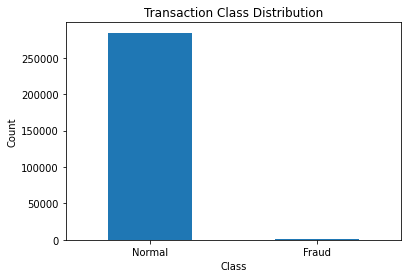

In [ ]:
count_classes = pd.value_counts(data['Class'], sort = True)
count_classes.plot(kind = 'bar', rot=0)

plt.title("Transaction Class Distribution")

label = ["Normal", "Fraud"]
plt.xticks(range(2), label)

plt.xlabel("Class")
plt.ylabel("Count")

Heat Map to show correlation between out predicting variables and class variables


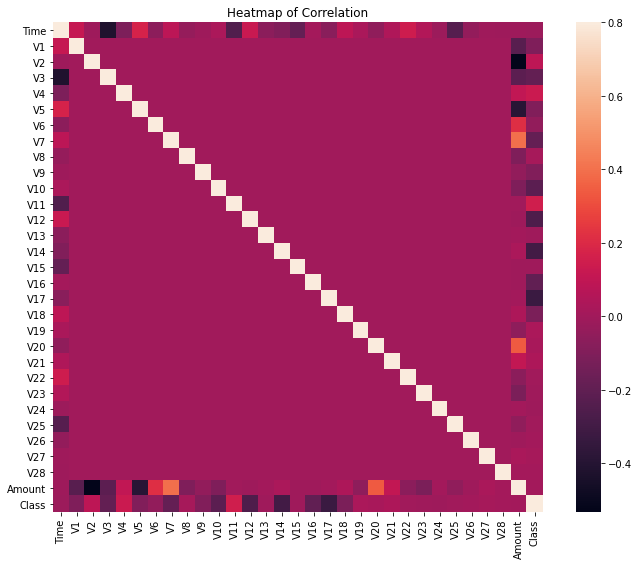

In [ ]:
# Plotting heatmap to show there is no strong correlation b/w class, amount or class, time
cormat=data.corr()
fig=plt.figure(figsize=(12,9))

sns.heatmap(cormat,vmax = .8 ,square=True,)
print(colored("Heat Map to show correlation between out predicting variables and class variables", attrs=['bold']))
plt.title("Heatmap of Correlation")
plt.show()

From the above heatmap, we observe that there are no significant correlation between the reduced features V1 to V28. Therefore we don't have to drop any of the columns as they are fairly unrelated to each other.

###**Summary -:** Since there are no missing values, no columns to be dropped and no incorrect data, there are no preprocessing steps required and we procees to train the models.

# Training the Models

In [ ]:
# Dividing the X and the Y from the dataset 
columns=data.columns.tolist()

columns=[c for c in columns if c not in ["Class"]]

target="Class"

X=data[columns]
Y=data[target]

print(X.shape)
print(Y.shape)

(284807, 30)
(284807,)


### Local Outlier Factor

Training at 60% dataset

In [ ]:
# Using Skicit-learn to split data into training and testing sets 
from sklearn.model_selection import train_test_split 

# Split the data into training and testing sets for 60% training set and 40% test set
xTrain60, xTest60, yTrain60, yTest60 = train_test_split(X, Y, train_size=0.6, random_state=1)


In [ ]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn import metrics
from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor(n_neighbors=20, contamination=Outlier_fraction)


In [ ]:
lof.fit(xTrain60, yTrain60)
yPred60 = lof.fit_predict(xTest60) 

# Reshape the prediction values to 0 for valid, 1 for fraud. 
yPred60[yPred60 == 1] = 0
yPred60[yPred60 == -1] = 1

Number of errors: 370
Accuracy: 99.67521922702176

		Classification Report

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    113737
           1       0.04      0.04      0.04       186

    accuracy                           1.00    113923
   macro avg       0.52      0.52      0.52    113923
weighted avg       1.00      1.00      1.00    113923



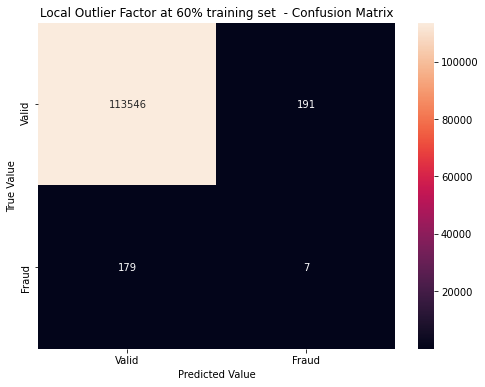


Local Outlier factor at 60% training set
f1-score=0.036 auc=0.037


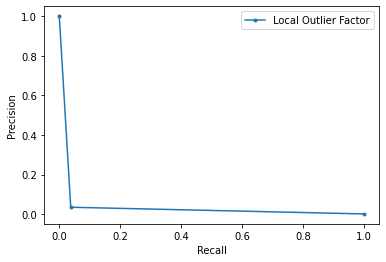


Other Performance Evaluation Metrics

Matthews Correlation Coefficient: 0.0349
Sensitivity: 0.9983
Specificity: 0.0376
Balanced Classification Rate: 0.51795


In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve

from sklearn.metrics import auc
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import matthews_corrcoef

n_errors = (yPred60 != yTest60).sum()
print(colored('Number of errors: {}'.format(n_errors), attrs=['bold']))
print(colored('Accuracy: {}'.format(accuracy_score(yTest60, yPred60) * 100), attrs=['bold']))
print()
print(colored('\t\tClassification Report', attrs=['bold']))
print()
print(classification_report(yTest60, yPred60))

# Plotting the confusion matrix 
classdict = {'normal':0, 'fraudulent':1}
lofacc60 = metrics.accuracy_score(yTest60, yPred60)
labels= ['Valid', 'Fraud'] 
plt.figure(figsize=(8, 6)) 
lofcm60 = confusion_matrix(yTest60, yPred60)
sns.heatmap(lofcm60, xticklabels= labels, yticklabels= labels, annot=True, fmt="d")
plt.title("Local Outlier Factor at 60% training set  - Confusion Matrix") 
plt.ylabel('True Value') 
plt.xlabel('Predicted Value') 
plt.show()
print()


lr_precision, lr_recall, _ = precision_recall_curve(yTest60, yPred60)
lr_f1, lr_auc = f1_score(yTest60, yPred60), auc(lr_recall, lr_precision)

lofauc60 = auc(lr_recall, lr_precision)
# summarize scores
print(colored('Local Outlier factor at 60% training set', attrs=['bold']))
print(colored('f1-score=%.3f auc=%.3f' % (lr_f1, lr_auc), attrs=['bold']))

plt.plot(lr_recall, lr_precision, marker='.', label='Local Outlier Factor')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

print()
print(colored('Other Performance Evaluation Metrics', attrs=['bold']))
print()
lofMCC60 = round (matthews_corrcoef(yTest60, yPred60), 4)
print(colored('Matthews Correlation Coefficient: {}'.format(lofMCC60), attrs=['bold']))
lofsens60 = round(lofcm60[0][0] / (lofcm60[0][1] + lofcm60[0][0]), 4)
# print(lofcm60[0][0] / (lofcm60[0][1] + lofcm60[0][0]))
print(colored('Sensitivity: {}'.format(lofsens60), attrs=['bold']))
lofspec60 = round(lofcm60[1][1] / (lofcm60[1][0] + lofcm60[1][1]), 4)
# print(lofcm60[1][1] / (lofcm60[1][0] + lofcm60[1][1]))
print(colored('Specificity: {}'.format(lofspec60), attrs=['bold']))
lofBCR60 = (lofsens60 + lofspec60) / 2
print(colored('Balanced Classification Rate: {}'.format(lofBCR60), attrs=['bold']))



Training at 70% dataset

In [ ]:
# Split the data into training and testing sets for 70% training set and 30% testing set
xTrain70, xTest70, yTrain70, yTest70 = train_test_split(X, Y, train_size=0.7, random_state=1)

In [ ]:
lof.fit(xTrain70, yTrain70)
yPred70 = lof.fit_predict(xTest70) 

# Reshape the prediction values to 0 for valid, 1 for fraud. 
yPred70[yPred70 == 1] = 0
yPred70[yPred70 == -1] = 1

Number of errors: 273
Accuracy: 99.6804887468839

		Classification Report

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85308
           1       0.03      0.04      0.04       135

    accuracy                           1.00     85443
   macro avg       0.52      0.52      0.52     85443
weighted avg       1.00      1.00      1.00     85443



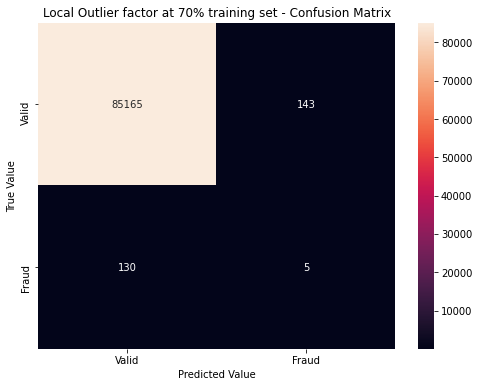


Local Outlier factor at 70% training set
f1-score=0.035 auc=0.036


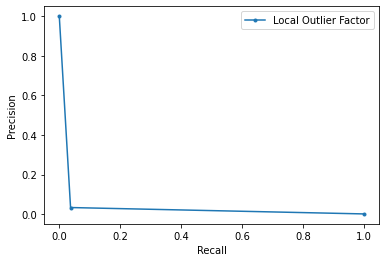


Other Performance Evaluation Metrics

Matthews Correlation Coefficient: 0.0338
Sensitivity: 0.9983
Specificity: 0.037
Balanced Classification Rate: 0.5176499999999999


In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve

from sklearn.metrics import auc
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import matthews_corrcoef

n_errors = (yPred70 != yTest70).sum()
print(colored('Number of errors: {}'.format(n_errors), attrs=['bold']))
print(colored('Accuracy: {}'.format(accuracy_score(yTest70, yPred70) * 100), attrs=['bold']))
print()
print(colored('\t\tClassification Report', attrs=['bold']))
print()
print(classification_report(yTest70, yPred70))

# Plotting the confusion matrix 
classdict = {'normal':0, 'fraudulent':1}
lofacc70 = metrics.accuracy_score(yTest70, yPred70)
labels= ['Valid', 'Fraud'] 
plt.figure(figsize=(8, 6)) 
lofcm70 = confusion_matrix(yTest70, yPred70)
sns.heatmap(lofcm70, xticklabels= labels, yticklabels= labels, annot=True, fmt="d")
plt.title("Local Outlier factor at 70% training set - Confusion Matrix") 
plt.ylabel('True Value') 
plt.xlabel('Predicted Value') 
plt.show()
print()
 
lr_precision, lr_recall, _ = precision_recall_curve(yTest70, yPred70)
lr_f1, lr_auc = f1_score(yTest70, yPred70), auc(lr_recall, lr_precision)
lofauc70 = auc(lr_recall, lr_precision)
# summarize scores
print(colored('Local Outlier factor at 70% training set', attrs=['bold']))
print(colored('f1-score=%.3f auc=%.3f' % (lr_f1, lr_auc), attrs=['bold']))

plt.plot(lr_recall, lr_precision, marker='.', label='Local Outlier Factor')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

print()
print(colored('Other Performance Evaluation Metrics', attrs=['bold']))
print()
lofMCC70 = round (matthews_corrcoef(yTest70, yPred70), 4)
print(colored('Matthews Correlation Coefficient: {}'.format(lofMCC70), attrs=['bold']))
lofsens70 = round(lofcm70[0][0] / (lofcm70[0][1] + lofcm70[0][0]), 4)
# print(lofcm70[0][0] / (lofcm70[0][1] + lofcm70[0][0]))
print(colored('Sensitivity: {}'.format(lofsens70), attrs=['bold']))
lofspec70 = round(lofcm70[1][1] / (lofcm70[1][0] + lofcm70[1][1]), 4)
# print(lofcm70[1][1] / (lofcm70[1][0] + lofcm70[1][1]))
print(colored('Specificity: {}'.format(lofspec70), attrs=['bold']))
lofBCR70 = (lofsens70 + lofspec70) / 2
print(colored('Balanced Classification Rate: {}'.format(lofBCR70), attrs=['bold']))



Training at 80% dataset

In [ ]:
# Split the data into training and testing sets for 80% training set and 20% testing set
xTrain80, xTest80, yTrain80, yTest80 = train_test_split(X, Y, train_size=0.8, random_state=1)

In [ ]:
lof.fit(xTrain80, yTrain80)
yPred80 = lof.fit_predict(xTest80) 

# Reshape the prediction values to 0 for valid, 1 for fraud. 
yPred80[yPred80 == 1] = 0
yPred80[yPred80 == -1] = 1

Number of errors: 182
Accuracy: 99.6804887468839

		Classification Report

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56875
           1       0.02      0.02      0.02        87

    accuracy                           1.00     56962
   macro avg       0.51      0.51      0.51     56962
weighted avg       1.00      1.00      1.00     56962




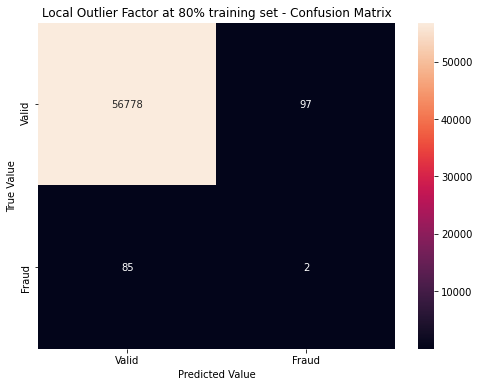


Local Outlier Factor at 80% training set
f1-score=0.022 auc=0.022


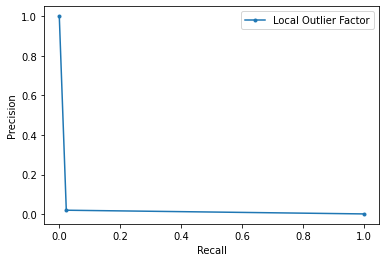


Other Performance Evaluation Metrics

Matthews Correlation Coefficient: 0.02
Sensitivity: 0.9983
Specificity: 0.023
Balanced Classification Rate: 0.5106499999999999


In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve

from sklearn.metrics import auc
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import matthews_corrcoef

n_errors = (yPred80 != yTest80).sum()
print(colored('Number of errors: {}'.format(n_errors), attrs=['bold']))
print(colored('Accuracy: {}'.format(accuracy_score(yTest80, yPred80) * 100), attrs=['bold']))
print()
print(colored('\t\tClassification Report', attrs=['bold']))
print()
print(classification_report(yTest80, yPred80))
print()

# Plotting the confusion matrix 
classdict = {'normal':0, 'fraudulent':1}
lofacc80 = metrics.accuracy_score(yTest80, yPred80)
labels= ['Valid', 'Fraud'] 
plt.figure(figsize=(8, 6)) 
lofcm80 = confusion_matrix(yTest80, yPred80)
sns.heatmap(lofcm80, xticklabels= labels, yticklabels= labels, annot=True, fmt="d")
plt.title("Local Outlier Factor at 80% training set - Confusion Matrix") 
plt.ylabel('True Value') 
plt.xlabel('Predicted Value') 
plt.show()
print()


lr_precision, lr_recall, _ = metrics.precision_recall_curve(yTest80, yPred80)
lr_f1, lr_auc = f1_score(yTest80, yPred80), auc(lr_recall, lr_precision)
lofauc80 = auc(lr_recall, lr_precision)
# summarize scores
print(colored('Local Outlier Factor at 80% training set', attrs=['bold']))
print(colored('f1-score=%.3f auc=%.3f' % (lr_f1, lr_auc), attrs=['bold']))

plt.plot(lr_recall, lr_precision, marker='.', label='Local Outlier Factor')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

print()
print(colored('Other Performance Evaluation Metrics', attrs=['bold']))
print()
lofMCC80 = round (matthews_corrcoef(yTest80, yPred80), 4)
print(colored('Matthews Correlation Coefficient: {}'.format(lofMCC80), attrs=['bold']))
lofsens80 = round(lofcm80[0][0] / (lofcm80[0][1] + lofcm80[0][0]), 4)
# print(lofcm80[0][0] / (lofcm80[0][1] + lofcm80[0][0]))
print(colored('Sensitivity: {}'.format(lofsens80), attrs=['bold']))
lofspec80 = round(lofcm80[1][1] / (lofcm80[1][0] + lofcm80[1][1]), 4)
# print(lofcm80[1][1] / (lofcm80[1][0] + lofcm80[1][1]))
print(colored('Specificity: {}'.format(lofspec80), attrs=['bold']))
lofBCR80 = (lofsens80 + lofspec80) / 2
print(colored('Balanced Classification Rate: {}'.format(lofBCR80), attrs=['bold']))



### Isolation Forest 

Training at 60% dataset

In [ ]:
from sklearn.ensemble import IsolationForest

isf = IsolationForest(max_samples=len(xTrain60), contamination=Outlier_fraction, random_state=1)


In [ ]:
isf.fit(xTrain60, yTrain60)
yPred60 = isf.predict(xTest60) 

# Reshape the prediction values to 0 for valid, 1 for fraud. 
yPred60[yPred60 == 1] = 0
yPred60[yPred60 == -1] = 1

Number of errors: 252
Accuracy: 99.77879796002563

		Classification Report

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    113737
           1       0.31      0.30      0.31       186

    accuracy                           1.00    113923
   macro avg       0.66      0.65      0.65    113923
weighted avg       1.00      1.00      1.00    113923



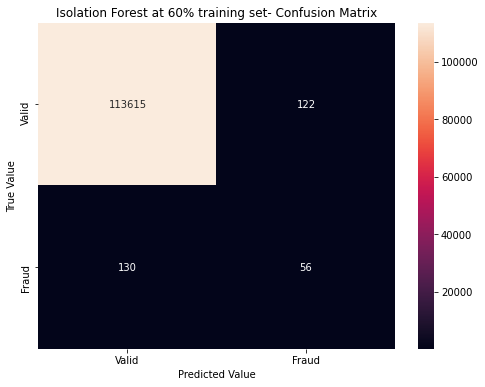


Isolation Forest at 60% training set
f1-score=0.308 auc=0.308


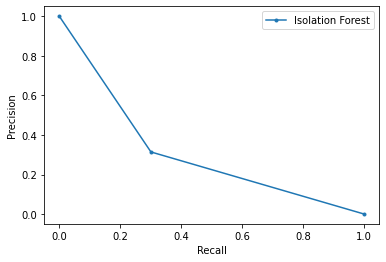


Other Performance Evaluation Metrics

Matthews Correlation Coefficient: 0.3067
Sensitivity: 0.9989
Specificity: 0.3011
Balanced Classification Rate: 0.65


In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve

from sklearn.metrics import auc
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import matthews_corrcoef


n_errors = (yPred60 != yTest60).sum()
print(colored('Number of errors: {}'.format(n_errors), attrs=['bold']))
print(colored('Accuracy: {}'.format(accuracy_score(yTest60, yPred60) * 100), attrs=['bold']))
print()
print(colored('\t\tClassification Report', attrs=['bold']))
print()
print(classification_report(yTest60, yPred60))

# Plotting the confusion matrix 
classdict = {'normal':0, 'fraudulent':1}
isfacc60 = metrics.accuracy_score(yTest60, yPred60)
labels= ['Valid', 'Fraud'] 
plt.figure(figsize=(8, 6)) 
isfcm60 = confusion_matrix(yTest60, yPred60)
sns.heatmap(isfcm60, xticklabels= labels, yticklabels= labels, annot=True, fmt="d")
plt.title("Isolation Forest at 60% training set- Confusion Matrix") 
plt.ylabel('True Value') 
plt.xlabel('Predicted Value') 
plt.show()
print()


lr_precision, lr_recall, _ = precision_recall_curve(yTest60, yPred60)
lr_f1, lr_auc = f1_score(yTest60, yPred60), auc(lr_recall, lr_precision)
# summarize scores
isfauc60 = auc(lr_recall, lr_precision)
print(colored('Isolation Forest at 60% training set', attrs=['bold']))
print(colored('f1-score=%.3f auc=%.3f' % (lr_f1, lr_auc), attrs=['bold']))

plt.plot(lr_recall, lr_precision, marker='.', label='Isolation Forest')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

print()
print(colored('Other Performance Evaluation Metrics', attrs=['bold']))
print()
isfMCC60 = round (matthews_corrcoef(yTest60, yPred60), 4)
print(colored('Matthews Correlation Coefficient: {}'.format(isfMCC60), attrs=['bold']))
isfsens60 = round(isfcm60[0][0] / (isfcm60[0][1] + isfcm60[0][0]), 4)
# print(isfcm60[0][0] / (isfcm60[0][1] + isfcm60[0][0]))
print(colored('Sensitivity: {}'.format(isfsens60), attrs=['bold']))
isfspec60 = round(isfcm60[1][1] / (isfcm60[1][0] + isfcm60[1][1]), 4)
# print(isfcm60[1][1] / (isfcm60[1][0] + isfcm60[1][1]))
print(colored('Specificity: {}'.format(isfspec60), attrs=['bold']))
isfBCR60 = (isfsens60 + isfspec60) / 2
print(colored('Balanced Classification Rate: {}'.format(isfBCR60), attrs=['bold']))


Training at 70% dataset

In [ ]:
isf = IsolationForest(max_samples=len(xTrain70), contamination=Outlier_fraction, random_state=1)

In [ ]:
isf.fit(xTrain70, yTrain70)
yPred70 = isf.predict(xTest70) 

# Reshape the prediction values to 0 for valid, 1 for fraud. 
yPred70[yPred70 == 1] = 0
yPred70[yPred70 == -1] = 1

Number of errors: 188
Accuracy: 99.77997027257938

		Classification Report

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85308
           1       0.31      0.33      0.32       135

    accuracy                           1.00     85443
   macro avg       0.66      0.66      0.66     85443
weighted avg       1.00      1.00      1.00     85443




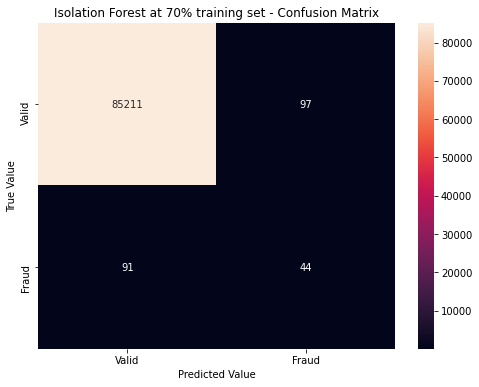


Isolation Forest at 70% training set
f1-score=0.319 auc=0.320


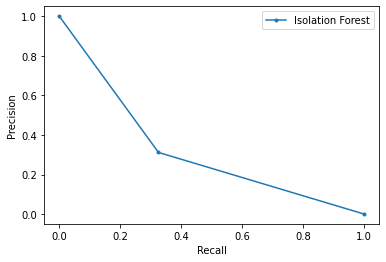


Other Performance Evaluation Metrics

Matthews Correlation Coefficient: 0.3178
Sensitivity: 0.9989
Specificity: 0.3011
Balanced Classification Rate: 0.6624


In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve

from sklearn.metrics import auc
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import matthews_corrcoef


n_errors = (yPred70 != yTest70).sum()
print(colored('Number of errors: {}'.format(n_errors), attrs=['bold']))
print(colored('Accuracy: {}'.format(accuracy_score(yTest70, yPred70) * 100), attrs=['bold']))
print()
print(colored('\t\tClassification Report', attrs=['bold']))
print()
print(classification_report(yTest70, yPred70))

# Plotting the confusion matrix 
classdict = {'normal':0, 'fraudulent':1}
isfacc70 = metrics.accuracy_score(yTest70, yPred70)
print()
labels= ['Valid', 'Fraud'] 
plt.figure(figsize=(8, 6)) 
isfcm70 = confusion_matrix(yTest70, yPred70)
sns.heatmap(isfcm70, xticklabels= labels, yticklabels= labels, annot=True, fmt="d")
plt.title("Isolation Forest at 70% training set - Confusion Matrix") 
plt.ylabel('True Value') 
plt.xlabel('Predicted Value') 
plt.show()
print()


lr_precision, lr_recall, _ = precision_recall_curve(yTest70, yPred70)
lr_f1, lr_auc = f1_score(yTest70, yPred70), auc(lr_recall, lr_precision)
isfauc70 = auc(lr_recall, lr_precision)
# summarize scores
print(colored('Isolation Forest at 70% training set', attrs=['bold']))
print(colored('f1-score=%.3f auc=%.3f' % (lr_f1, lr_auc), attrs=['bold']))


plt.plot(lr_recall, lr_precision, marker='.', label='Isolation Forest')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

print()
print(colored('Other Performance Evaluation Metrics', attrs=['bold']))
print()
isfMCC70 = round (matthews_corrcoef(yTest70, yPred70), 4)
print(colored('Matthews Correlation Coefficient: {}'.format(isfMCC70), attrs=['bold']))
isfsens70 = round(isfcm70[0][0] / (isfcm70[0][1] + isfcm70[0][0]), 4)
# print(isfcm70[0][0] / (isfcm70[0][1] + isfcm70[0][0]))
print(colored('Sensitivity: {}'.format(isfsens70), attrs=['bold']))
isfspec70 = round(isfcm70[1][1] / (isfcm70[1][0] + isfcm70[1][1]), 4)
# print(isfcm70[1][1] / (isfcm70[1][0] + isfcm70[1][1]))
print(colored('Specificity: {}'.format(isfspec60), attrs=['bold']))
isfBCR70 = (isfsens70 + isfspec70) / 2
print(colored('Balanced Classification Rate: {}'.format(isfBCR70), attrs=['bold']))


Training at 80% dataset

In [ ]:
isf = IsolationForest(max_samples=len(xTrain80), contamination=Outlier_fraction, random_state=1)

In [ ]:
isf.fit(xTrain80, yTrain80)
yPred80 = isf.predict(xTest80) 

# Reshape the prediction values to 0 for valid, 1 for fraud. 
yPred80[yPred80 == 1] = 0
yPred80[yPred80 == -1] = 1

Number of errors: 118
Accuracy: 99.79284435237527

		Classification Report

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56875
           1       0.33      0.34      0.34        87

    accuracy                           1.00     56962
   macro avg       0.66      0.67      0.67     56962
weighted avg       1.00      1.00      1.00     56962




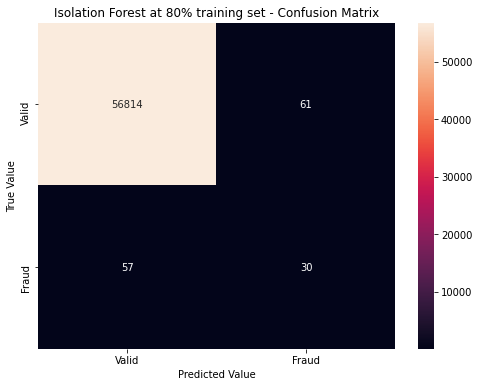


Isolation Forest at 80% training set
f1-score=0.337 auc=0.338


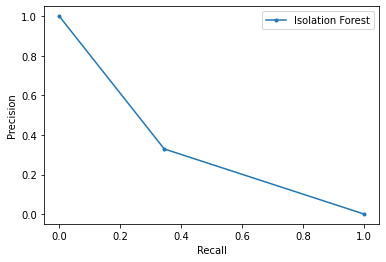


Other Performance Evaluation Metrics

Matthews Correlation Coefficient: 0.3361
Sensitivity: 0.9989
Specificity: 0.3448
Balanced Classification Rate: 0.6718500000000001


In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve

from sklearn.metrics import auc
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import matthews_corrcoef

n_errors = (yPred80 != yTest80).sum()
print(colored('Number of errors: {}'.format(n_errors), attrs=['bold']))
print(colored('Accuracy: {}'.format(accuracy_score(yTest80, yPred80) * 100), attrs=['bold']))
print()
print(colored('\t\tClassification Report', attrs=['bold']))
print()
print(classification_report(yTest80, yPred80))

# Plotting the confusion matrix 
classdict = {'normal':0, 'fraudulent':1}
isfacc80 = metrics.accuracy_score(yTest80, yPred80)
print()
labels= ['Valid', 'Fraud'] 
plt.figure(figsize=(8, 6)) 
isfcm80 = confusion_matrix(yTest80, yPred80)
sns.heatmap(isfcm80, xticklabels= labels, yticklabels= labels, annot=True, fmt="d")
plt.title("Isolation Forest at 80% training set - Confusion Matrix") 
plt.ylabel('True Value') 
plt.xlabel('Predicted Value') 
plt.show()
print()


lr_precision, lr_recall, _ = precision_recall_curve(yTest80, yPred80)
lr_f1, lr_auc = f1_score(yTest80, yPred80), auc(lr_recall, lr_precision)
isfauc80 = auc(lr_recall, lr_precision)
# summarize scores
print(colored('Isolation Forest at 80% training set', attrs=['bold']))
print(colored('f1-score=%.3f auc=%.3f' % (lr_f1, lr_auc), attrs=['bold']))

plt.plot(lr_recall, lr_precision, marker='.', label='Isolation Forest')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

print()
print(colored('Other Performance Evaluation Metrics', attrs=['bold']))
print()
isfMCC80 = round (matthews_corrcoef(yTest80, yPred80), 4)
print(colored('Matthews Correlation Coefficient: {}'.format(isfMCC80), attrs=['bold']))
isfsens80 = round(isfcm80[0][0] / (isfcm80[0][1] + isfcm80[0][0]), 4)
# print(isfcm80[0][0] / (isfcm80[0][1] + isfcm80[0][0]))
print(colored('Sensitivity: {}'.format(isfsens80), attrs=['bold']))
isfspec80 = round(isfcm80[1][1] / (isfcm80[1][0] + isfcm80[1][1]), 4)
# print(isfcm80[1][1] / (isfcm80[1][0] + isfcm80[1][1]))
print(colored('Specificity: {}'.format(isfspec80), attrs=['bold']))
isfBCR80 = (isfsens80 + isfspec80) / 2
print(colored('Balanced Classification Rate: {}'.format(isfBCR80), attrs=['bold']))



### K-Means Clustering

In [ ]:
# from sklearn.cluster import k-means clustering
from sklearn.cluster import KMeans
gs = KMeans(init='k-means++', n_clusters=2,random_state=0)

Training at 60% dataset

In [ ]:
# Split the data into training and testing sets for 60% training set and 40% test set
xTrain60, xTest60, yTrain60, yTest60 = train_test_split(X, Y, train_size=0.6, random_state=1)

In [ ]:
# predict using test data
gs.fit(xTrain60, yTrain60)
yPred60 = gs.predict(xTest60)

Number of errors: 52407
Accuracy: 53.997875758187554

		Classification Report

              precision    recall  f1-score   support

           0       1.00      0.54      0.70    113737
           1       0.00      0.38      0.00       186

    accuracy                           0.54    113923
   macro avg       0.50      0.46      0.35    113923
weighted avg       1.00      0.54      0.70    113923



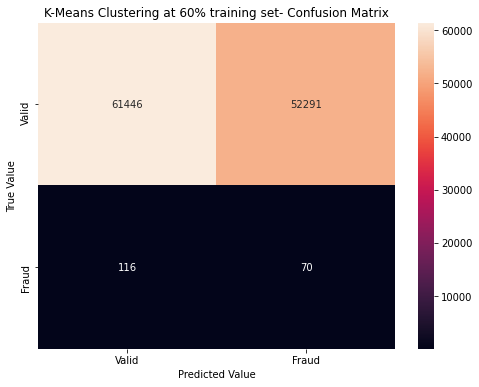


K-Means Clustering at 60% training set
f1-score=0.003 auc=0.189


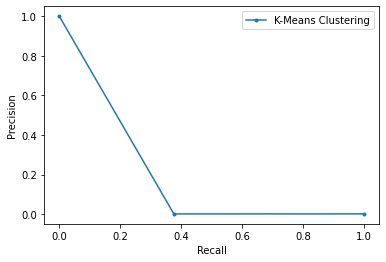


Other Performance Evaluation Metrics

Matthews Correlation Coefficient: -0.0068
Sensitivity: 0.5402
Specificity: 0.3763
Balanced Classification Rate: 0.45825000000000005


In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve

from sklearn.metrics import auc
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import matthews_corrcoef

n_errors = (yPred60 != yTest60).sum()
print(colored('Number of errors: {}'.format(n_errors), attrs=['bold']))
print(colored('Accuracy: {}'.format(accuracy_score(yTest60, yPred60) * 100), attrs=['bold']))
print()
print(colored('\t\tClassification Report', attrs=['bold']))
print()
print(classification_report(yTest60, yPred60))

# Plotting the confusion matrix 
classdict = {'normal':0, 'fraudulent':1}
gsacc60 = metrics.accuracy_score(yTest60, yPred60)
labels= ['Valid', 'Fraud'] 
plt.figure(figsize=(8, 6))
gscm60 =  confusion_matrix(yTest60, yPred60)
sns.heatmap(gscm60, xticklabels= labels, yticklabels= labels, annot=True, fmt="d")
plt.title("K-Means Clustering at 60% training set- Confusion Matrix") 
plt.ylabel('True Value') 
plt.xlabel('Predicted Value') 
plt.show()
print()


lr_precision, lr_recall, _ = precision_recall_curve(yTest60, yPred60)
lr_f1, lr_auc = f1_score(yTest60, yPred60), auc(lr_recall, lr_precision)
gsauc60 = auc(lr_recall, lr_precision)
# summarize scores

print(colored('K-Means Clustering at 60% training set', attrs=['bold']))
print(colored('f1-score=%.3f auc=%.3f' % (lr_f1, lr_auc), attrs=['bold']))

plt.plot(lr_recall, lr_precision, marker='.', label='K-Means Clustering')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

print()
print(colored('Other Performance Evaluation Metrics', attrs=['bold']))
print()
gsMCC60 = round (matthews_corrcoef(yTest60, yPred60), 4)
print(colored('Matthews Correlation Coefficient: {}'.format(gsMCC60), attrs=['bold']))
gssens60 = round(gscm60[0][0] / (gscm60[0][1] + gscm60[0][0]), 4)
# print(gscm60[0][0] / (gscm60[0][1] + gscm60[0][0]))
print(colored('Sensitivity: {}'.format(gssens60), attrs=['bold']))
gsspec60 = round(gscm60[1][1] / (gscm60[1][0] + gscm60[1][1]), 4)
# print(gscm60[1][1] / (gscm60[1][0] + gscm60[1][1]))
print(colored('Specificity: {}'.format(gsspec60), attrs=['bold']))
gsBCR60 = (gssens60 + gsspec60) / 2
print(colored('Balanced Classification Rate: {}'.format(gsBCR60), attrs=['bold']))

Training at 70% dataset

In [ ]:
# Split the data into training and testing sets for 60% training set and 40% test set
xTrain70, xTest70, yTrain70, yTest70 = train_test_split(X, Y, train_size=0.7, random_state=1)

In [ ]:
# predict using test data
yPred70 = gs.fit(xTrain70, yTrain70).predict(xTest70)

Number of errors: 39410
Accuracy: 53.87568320400735

		Classification Report

              precision    recall  f1-score   support

           0       1.00      0.54      0.70     85308
           1       0.00      0.39      0.00       135

    accuracy                           0.54     85443
   macro avg       0.50      0.46      0.35     85443
weighted avg       1.00      0.54      0.70     85443



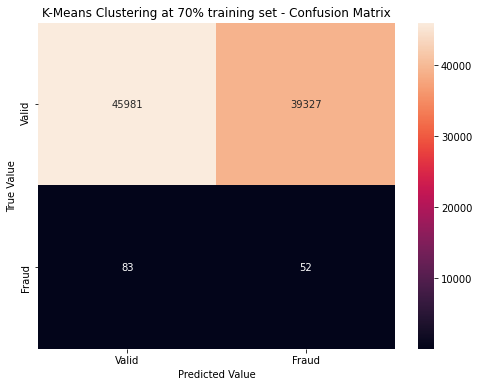


K-Means Clustering at 70% training set
f1-score=0.003 auc=0.194


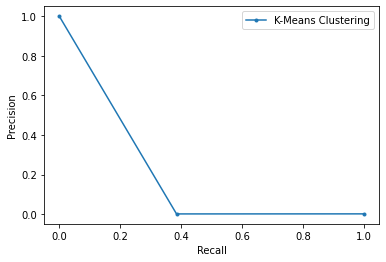


Other Performance Evaluation Metrics

Matthews Correlation Coefficient: -0.006
Sensitivity: 0.539
Specificity: 0.3852
Balanced Classification Rate: 0.4621


In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve

from sklearn.metrics import auc
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import matthews_corrcoef

n_errors = (yPred70 != yTest70).sum()
print(colored('Number of errors: {}'.format(n_errors), attrs=['bold']))
print(colored('Accuracy: {}'.format(accuracy_score(yTest70, yPred70) * 100), attrs=['bold']))
print()
print(colored('\t\tClassification Report', attrs=['bold']))
print()
print(classification_report(yTest70, yPred70))

# Plotting the confusion matrix 
classdict = {'normal':0, 'fraudulent':1}
gsacc70 = metrics.accuracy_score(yTest70, yPred70)
labels= ['Valid', 'Fraud'] 
plt.figure(figsize=(8, 6))
gscm70 = confusion_matrix(yTest70, yPred70)
sns.heatmap(gscm70, xticklabels= labels, yticklabels= labels, annot=True, fmt="d")
plt.title("K-Means Clustering at 70% training set - Confusion Matrix") 
plt.ylabel('True Value') 
plt.xlabel('Predicted Value') 
plt.show()
print()
 
lr_precision, lr_recall, _ = precision_recall_curve(yTest70, yPred70)
lr_f1, lr_auc = f1_score(yTest70, yPred70), auc(lr_recall, lr_precision)
gsauc70 = auc(lr_recall, lr_precision)

# summarize scores
print(colored('K-Means Clustering at 70% training set', attrs=['bold']))
print(colored('f1-score=%.3f auc=%.3f' % (lr_f1, lr_auc), attrs=['bold']))

plt.plot(lr_recall, lr_precision, marker='.', label='K-Means Clustering')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

print()
print(colored('Other Performance Evaluation Metrics', attrs=['bold']))
print()
gsMCC70 = round (matthews_corrcoef(yTest70, yPred70), 4)
print(colored('Matthews Correlation Coefficient: {}'.format(gsMCC70), attrs=['bold']))
gssens70 = round(gscm70[0][0] / (gscm70[0][1] + gscm70[0][0]), 4)
# print(gscm70[0][0] / (gscm70[0][1] + gscm70[0][0]))
print(colored('Sensitivity: {}'.format(gssens70), attrs=['bold']))
gsspec70 = round(gscm70[1][1] / (gscm70[1][0] + gscm70[1][1]), 4)
# print(gscm70[1][1] / (gscm70[1][0] + gscm70[1][1]))
print(colored('Specificity: {}'.format(gsspec70), attrs=['bold']))
gsBCR70 = (gssens70 + gsspec70) / 2
print(colored('Balanced Classification Rate: {}'.format(gsBCR70), attrs=['bold']))


Training at 80% dataset

In [ ]:
# Split the data into training and testing sets for 60% training set and 40% test set
xTrain80, xTest80, yTrain80, yTest80 = train_test_split(X, Y, train_size=0.8, random_state=1)

In [ ]:
# predict using test data
yPred80 = gs.fit(xTrain80, yTrain80).predict(xTest80)


Number of errors: 26257
Accuracy: 53.904357290825466

		Classification Report

              precision    recall  f1-score   support

           0       1.00      0.54      0.70     56875
           1       0.00      0.36      0.00        87

    accuracy                           0.54     56962
   macro avg       0.50      0.45      0.35     56962
weighted avg       1.00      0.54      0.70     56962




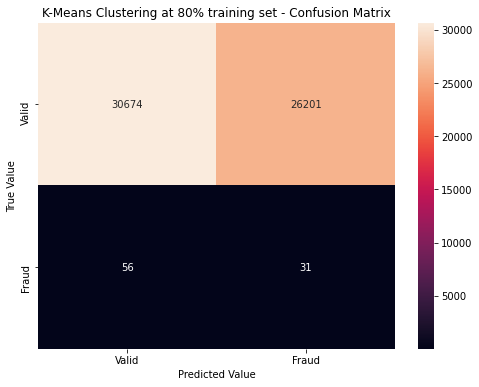


K-Means Clustering at 80% training set
f1-score=0.002 auc=0.179


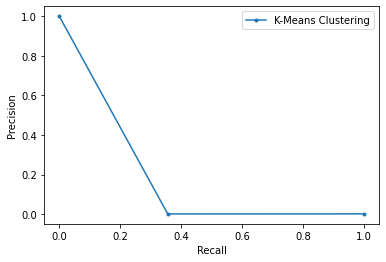


Other Performance Evaluation Metrics

Matthews Correlation Coefficient: -0.0082
Sensitivity: 0.5393
Specificity: 0.3563
Balanced Classification Rate: 0.4478


In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve

from sklearn.metrics import auc
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import matthews_corrcoef

n_errors = (yPred80 != yTest80).sum()
print(colored('Number of errors: {}'.format(n_errors), attrs=['bold']))
print(colored('Accuracy: {}'.format(accuracy_score(yTest80, yPred80) * 100), attrs=['bold']))
print()

print(colored('\t\tClassification Report', attrs=['bold']))
print()
print(classification_report(yTest80, yPred80))

# Plotting the confusion matrix 
classdict = {'normal':0, 'fraudulent':1}
gsacc80 = metrics.accuracy_score(yTest80, yPred80)
print()
labels= ['Valid', 'Fraud'] 
plt.figure(figsize=(8, 6))
gscm80 =  confusion_matrix(yTest80, yPred80)
sns.heatmap(gscm80, xticklabels= labels, yticklabels= labels, annot=True, fmt="d")
plt.title("K-Means Clustering at 80% training set - Confusion Matrix") 
plt.ylabel('True Value') 
plt.xlabel('Predicted Value') 
plt.show()
print()


lr_precision, lr_recall, _ = precision_recall_curve(yTest80, yPred80)
lr_f1, lr_auc = f1_score(yTest80, yPred80), auc(lr_recall, lr_precision)
gsauc80 = auc(lr_recall, lr_precision)
# summarize scores
print(colored('K-Means Clustering at 80% training set', attrs=['bold']))
print(colored('f1-score=%.3f auc=%.3f' % (lr_f1, lr_auc), attrs=['bold']))

plt.plot(lr_recall, lr_precision, marker='.', label='K-Means Clustering')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

print()
print(colored('Other Performance Evaluation Metrics', attrs=['bold']))
print()
gsMCC80 = round (matthews_corrcoef(yTest80, yPred80), 4)
print(colored('Matthews Correlation Coefficient: {}'.format(gsMCC80), attrs=['bold']))
gssens80 = round(gscm80[0][0] / (gscm80[0][1] + gscm80[0][0]), 4)
# print(gscm80[0][0] / (gscm80[0][1] + gscm80[0][0]))
print(colored('Sensitivity: {}'.format(gssens80), attrs=['bold']))
gsspec80 = round(gscm80[1][1] / (gscm80[1][0] + gscm80[1][1]), 4)
# print(gscm80[1][1] / (gscm80[1][0] + gscm80[1][1]))
print(colored('Specificity: {}'.format(gsspec80), attrs=['bold']))
gsBCR80 = (gssens80 + gsspec80) / 2
print(colored('Balanced Classification Rate: {}'.format(gsBCR80), attrs=['bold']))

## Comparison of area under precision recall curves 

Training at 60% dataset

In [ ]:
from sklearn.model_selection import train_test_split 

# Split the data into training and testing sets for 60% training set and 40% test set
xTr60, xTs60, yTr60, yTs60 = train_test_split(X, Y, train_size=0.6, random_state=1)

xTr60iso, xTs60iso, yTr60iso, yTs60iso = train_test_split(X, Y, train_size=0.6, random_state=1)

xTr60gs, xTs60gs, yTr60gs, yTs60gs = train_test_split(X, Y, train_size=0.6, random_state=1)


In [ ]:
lof.fit(xTr60, yTr60)
yPr60 = lof.fit_predict(xTs60) 
# Reshape the prediction values to 0 for valid, 1 for fraud. 
yPr60[yPr60 == 1] = 0
yPr60[yPr60 == -1] = 1


In [ ]:
isf = IsolationForest(max_samples=len(xTr60iso), contamination=Outlier_fraction, random_state=1)
isf.fit(xTr60iso, yTr60iso)
yPr60iso = isf.predict(xTs60iso) 

# Reshape the prediction values to 0 for valid, 1 for fraud.
yPr60iso[yPr60iso == 1] = 0
yPr60iso[yPr60iso == -1] = 1

In [ ]:
gs = KMeans(init='k-means++', n_clusters=2,random_state=0)

yPr60gs = gs.fit(xTr60gs, yTr60gs).predict(xTs60gs)


Local Outlier factor at 60% training set
f1-score=0.036 auc=0.037

Isolation Forest at 60% training set
f1-score=0.308 auc=0.308

K-Means Clustering at 60% training set
f1-score=0.003 auc=0.189



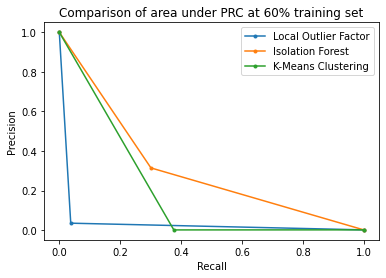

In [ ]:
# Representing the comparison in graphical form
lr_precision, lr_recall, _ = precision_recall_curve(yTs60, yPr60)
lr_f1, lr_auc = f1_score(yTs60, yPr60), auc(lr_recall, lr_precision)

lr_precisioniso, lr_recalliso, _ = precision_recall_curve(yTs60iso, yPr60iso)
lr_f1iso, lr_auciso = f1_score(yTs60iso, yPr60iso), auc(lr_recalliso, lr_precisioniso)

lr_precisiongs, lr_recallgs, _ = precision_recall_curve(yTs60gs, yPr60gs)
lr_f1gs, lr_aucgs = f1_score(yTs60gs, yPr60gs), auc(lr_recallgs, lr_precisiongs)

# summarize scores
print(colored('Local Outlier factor at 60% training set', attrs=['bold']))
print(colored('f1-score=%.3f auc=%.3f' % (lr_f1, lr_auc), attrs=['bold']))
print()
print(colored('Isolation Forest at 60% training set', attrs=['bold']))
print(colored('f1-score=%.3f auc=%.3f' % (lr_f1iso, lr_auciso), attrs=['bold']))
print()
print(colored('K-Means Clustering at 60% training set', attrs=['bold']))
print(colored('f1-score=%.3f auc=%.3f' % (lr_f1gs, lr_aucgs), attrs=['bold']))

plt.plot(lr_recall, lr_precision, marker='.', label='Local Outlier Factor')
plt.plot(lr_recalliso, lr_precisioniso, marker='.', label='Isolation Forest')
plt.plot(lr_recallgs, lr_precisiongs, marker='.', label='K-Means Clustering')
print()
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Comparison of area under PRC at 60% training set')
# show the legend
plt.legend()
# show the plot
plt.show()



Training at 70% dataset

In [ ]:
from sklearn.model_selection import train_test_split 

# Split the data into training and testing sets for 60% training set and 40% test set
xTr70, xTs70, yTr70, yTs70 = train_test_split(X, Y, train_size=0.7, random_state=1)

xTr70iso, xTs70iso, yTr70iso, yTs70iso = train_test_split(X, Y, train_size=0.7, random_state=1)

xTr70gs, xTs70gs, yTr70gs, yTs70gs = train_test_split(X, Y, train_size=0.7, random_state=1)

In [ ]:
lof.fit(xTr70, yTr70)
yPr70 = lof.fit_predict(xTs70) 

# Reshape the prediction values to 0 for valid, 1 for fraud. 
yPr70[yPr70 == 1] = 0
yPr70[yPr70 == -1] = 1


In [ ]:
isf = IsolationForest(max_samples=len(xTr70iso), contamination=Outlier_fraction, random_state=1)
isf.fit(xTr70iso, yTr70iso)
yPr70iso = isf.predict(xTs70iso) 

# Reshape the prediction values to 0 for valid, 1 for fraud.
yPr70iso[yPr70iso == 1] = 0
yPr70iso[yPr70iso == -1] = 1


In [ ]:
gs = KMeans(init='k-means++', n_clusters=2,random_state=0)

yPr70gs = gs.fit(xTr70gs, yTr70gs).predict(xTs70gs)

Local Outlier factor at 70% training set
f1-score=0.035 auc=0.036

Isolation Forest at 70% training set
f1-score=0.319 auc=0.320

K-Means Clustering at 70% training set
f1-score=0.003 auc=0.194



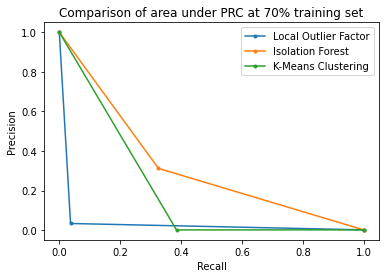

In [ ]:
# Representing the comparison in graphical form
lr_precision, lr_recall, _ = precision_recall_curve(yTs70, yPr70)
lr_f1, lr_auc = f1_score(yTs70, yPr70), auc(lr_recall, lr_precision)

lr_precisioniso, lr_recalliso, _ = precision_recall_curve(yTs70iso, yPr70iso)
lr_f1iso, lr_auciso = f1_score(yTs70iso, yPr70iso), auc(lr_recalliso, lr_precisioniso)

lr_precisiongs, lr_recallgs, _ = precision_recall_curve(yTs70gs, yPr70gs)
lr_f1gs, lr_aucgs = f1_score(yTs70gs, yPr70gs), auc(lr_recallgs, lr_precisiongs)

# summarize scores
print(colored('Local Outlier factor at 70% training set', attrs=['bold']))
print(colored('f1-score=%.3f auc=%.3f' % (lr_f1, lr_auc), attrs=['bold']))
print()
print(colored('Isolation Forest at 70% training set', attrs=['bold']))
print(colored('f1-score=%.3f auc=%.3f' % (lr_f1iso, lr_auciso), attrs=['bold']))
print()
print(colored('K-Means Clustering at 70% training set', attrs=['bold']))
print(colored('f1-score=%.3f auc=%.3f' % (lr_f1gs, lr_aucgs), attrs=['bold']))

plt.plot(lr_recall, lr_precision, marker='.', label='Local Outlier Factor')
plt.plot(lr_recalliso, lr_precisioniso, marker='.', label='Isolation Forest')
plt.plot(lr_recallgs, lr_precisiongs, marker='.', label='K-Means Clustering')
print()
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Comparison of area under PRC at 70% training set')
# show the legend
plt.legend()
# show the plot
plt.show()



Training at 80% dataset

In [ ]:
from sklearn.model_selection import train_test_split 

# Split the data into training and testing sets for 60% training set and 40% test set
xTr80, xTs80, yTr80, yTs80 = train_test_split(X, Y, train_size=0.8, random_state=1)

xTr80iso, xTs80iso, yTr80iso, yTs80iso = train_test_split(X, Y, train_size=0.8, random_state=1)

xTr80gs, xTs80gs, yTr80gs, yTs80gs = train_test_split(X, Y, train_size=0.8, random_state=1)

In [ ]:
lof.fit(xTr80, yTr80)
yPr80 = lof.fit_predict(xTs80) 

# Reshape the prediction values to 0 for valid, 1 for fraud. 
yPr80[yPr80 == 1] = 0
yPr80[yPr80 == -1] = 1

In [ ]:
isf = IsolationForest(max_samples=len(xTr80iso), contamination=Outlier_fraction, random_state=1)
isf.fit(xTr80iso, yTr80iso)
yPr80iso = isf.predict(xTs80iso) 

# Reshape the prediction values to 0 for valid, 1 for fraud.
yPr80iso[yPr80iso == 1] = 0
yPr80iso[yPr80iso == -1] = 1


In [ ]:
gs = KMeans(init='k-means++', n_clusters=2,random_state=0)

yPr80gs = gs.fit(xTr80gs, yTr80gs).predict(xTs80gs)

Local Outlier factor at 80% training set
f1-score=0.022 auc=0.022

Isolation Forest at 80% training set
f1-score=0.337 auc=0.338

K-Means Clustering at 80% training set
f1-score=0.002 auc=0.179



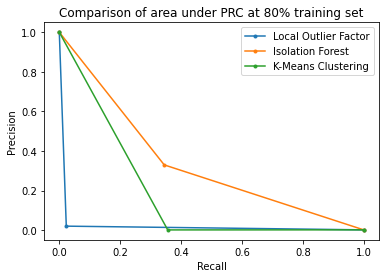

In [ ]:
# Representing the comparison in graphical form
lr_precision, lr_recall, _ = precision_recall_curve(yTs80, yPr80)
lr_f1, lr_auc = f1_score(yTs80, yPr80), auc(lr_recall, lr_precision)

lr_precisioniso, lr_recalliso, _ = precision_recall_curve(yTs80iso, yPr80iso)
lr_f1iso, lr_auciso = f1_score(yTs80iso, yPr80iso), auc(lr_recalliso, lr_precisioniso)

lr_precisiongs, lr_recallgs, _ = precision_recall_curve(yTs80gs, yPr80gs)
lr_f1gs, lr_aucgs = f1_score(yTs80gs, yPr80gs), auc(lr_recallgs, lr_precisiongs)

# summarize scores
print(colored('Local Outlier factor at 80% training set', attrs=['bold']))
print(colored('f1-score=%.3f auc=%.3f' % (lr_f1, lr_auc), attrs=['bold']))
print()
print(colored('Isolation Forest at 80% training set', attrs=['bold']))
print(colored('f1-score=%.3f auc=%.3f' % (lr_f1iso, lr_auciso), attrs=['bold']))
print()
print(colored('K-Means Clustering at 80% training set', attrs=['bold']))
print(colored('f1-score=%.3f auc=%.3f' % (lr_f1gs, lr_aucgs), attrs=['bold']))

plt.plot(lr_recall, lr_precision, marker='.', label='Local Outlier Factor')
plt.plot(lr_recalliso, lr_precisioniso, marker='.', label='Isolation Forest')
plt.plot(lr_recallgs, lr_precisiongs, marker='.', label='K-Means Clustering')
print()
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Comparison of area under PRC at 80% training set')
# show the legend
plt.legend()
# show the plot
plt.show()


## Comparison of Accuracy

Local Outlier Factor: 99.67521922702176
Isolation Forest: 99.77879796002563
K-Means Clustering: 53.997875758187554



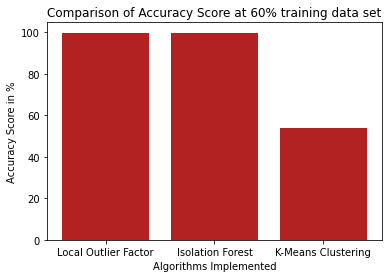

In [ ]:
algo = ['Local Outlier Factor', 'Isolation Forest', 'K-Means Clustering']
accu60 = [lofacc60 * 100, isfacc60 * 100, gsacc60 * 100]
print(colored(algo[0], attrs=['bold']), end=": ")
print(colored(accu60[0], attrs=['bold']))
print(colored(algo[1], attrs=['bold']), end=": ")
print(colored(accu60[1], attrs=['bold']))
print(colored(algo[2], attrs=['bold']), end=": ")
print(colored(accu60[2], attrs=['bold']))
plt.bar(algo, accu60, color='FireBrick')
print()
plt.xlabel('Algorithms Implemented')
plt.ylabel('Accuracy Score in %')
plt.title('Comparison of Accuracy Score at 60% training data set')
plt.show()

Local Outlier Factor: 99.6804887468839
Isolation Forest: 99.77997027257938
K-Means Clustering: 53.87568320400735



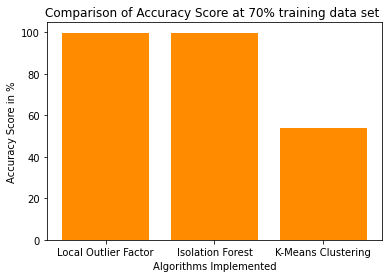

In [ ]:
accu70 = [lofacc70 * 100, isfacc70 * 100, gsacc70 * 100]
print(colored(algo[0], attrs=['bold']), end=": ")
print(colored(accu70[0], attrs=['bold']))
print(colored(algo[1], attrs=['bold']), end=": ")
print(colored(accu70[1], attrs=['bold']))
print(colored(algo[2], attrs=['bold']), end=": ")
print(colored(accu70[2], attrs=['bold']))
plt.bar(algo, accu70, color='DarkOrange')
print()
plt.xlabel('Algorithms Implemented')
plt.ylabel('Accuracy Score in %')
plt.title('Comparison of Accuracy Score at 70% training data set ')
plt.show()

Local Outlier Factor: 99.6804887468839
Isolation Forest: 99.79284435237527
K-Means Clustering: 53.904357290825466



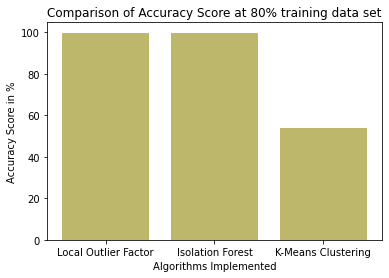

In [ ]:
accu80 = [lofacc80 * 100, isfacc80 * 100, gsacc80 * 100]
print(colored(algo[0], attrs=['bold']), end=": ")
print(colored(accu80[0], attrs=['bold']))
print(colored(algo[1], attrs=['bold']), end=": ")
print(colored(accu80[1], attrs=['bold']))
print(colored(algo[2], attrs=['bold']), end=": ")
print(colored(accu80[2], attrs=['bold']))
plt.bar(algo, accu80, color='DarkKhaki')
print()
plt.xlabel('Algorithms Implemented')
plt.ylabel('Accuracy Score in %')
plt.title('Comparison of Accuracy Score at 80% training data set')
plt.show()

## Comparison of Matthews Correlation Coefficient(MCC)

Local Outlier Factor: 0.0349
Isolation Forest: 0.3067
K-Means Clustering: -0.0068



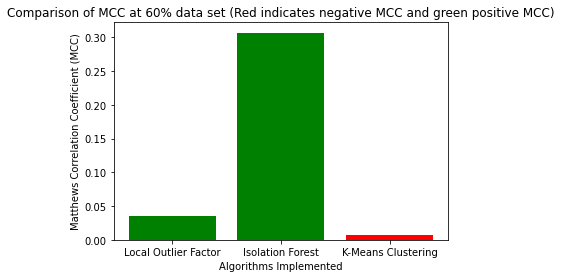

In [ ]:
mcc60 = [lofMCC60, isfMCC60, gsMCC60]
print(colored(algo[0], attrs=['bold']), end=": ")
print(colored(mcc60[0], attrs=['bold']))
print(colored(algo[1], attrs=['bold']), end=": ")
print(colored(mcc60[1], attrs=['bold']))
print(colored(algo[2], attrs=['bold']), end=": ")
print(colored(mcc60[2], attrs=['bold']))
mcc60[0] = abs(mcc60[0])
mcc60[1] = abs(mcc60[1])
mcc60[2] = abs(mcc60[2])

plt.bar(algo, mcc60, color=['green', 'green', 'red'])
print()
plt.xlabel('Algorithms Implemented')
plt.ylabel('Matthews Correlation Coefficient (MCC)')
plt.title('Comparison of MCC at 60% data set (Red indicates negative MCC and green positive MCC)')
plt.show()

Local Outlier Factor: 0.0338
Isolation Forest: 0.3178
K-Means Clustering: -0.006



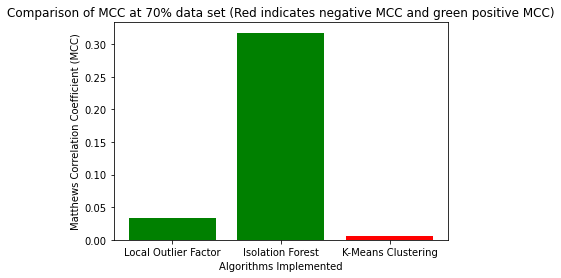

In [ ]:
mcc70 = [lofMCC70, isfMCC70, gsMCC70]
print(colored(algo[0], attrs=['bold']), end=": ")
print(colored(mcc70[0], attrs=['bold']))
print(colored(algo[1], attrs=['bold']), end=": ")
print(colored(mcc70[1], attrs=['bold']))
print(colored(algo[2], attrs=['bold']), end=": ")
print(colored(mcc70[2], attrs=['bold']))
mcc70[0] = abs(mcc70[0])
mcc70[1] = abs(mcc70[1])
mcc70[2] = abs(mcc70[2])

plt.bar(algo, mcc70, color=['green', 'green', 'red'])
print()
plt.xlabel('Algorithms Implemented')
plt.ylabel('Matthews Correlation Coefficient (MCC)')
plt.title('Comparison of MCC at 70% data set (Red indicates negative MCC and green positive MCC)')
plt.show()

Local Outlier Factor: 0.02
Isolation Forest: 0.3361
K-Means Clustering: -0.0082



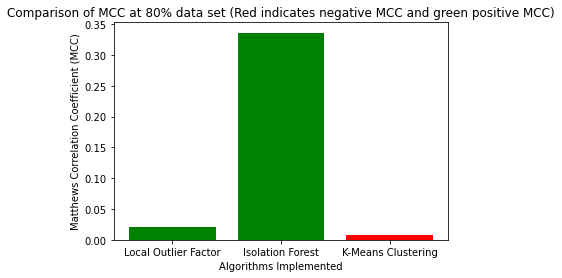

In [ ]:
mcc80 = [lofMCC80, isfMCC80, gsMCC80]
print(colored(algo[0], attrs=['bold']), end=": ")
print(colored(mcc80[0], attrs=['bold']))
print(colored(algo[1], attrs=['bold']), end=": ")
print(colored(mcc80[1], attrs=['bold']))
print(colored(algo[2], attrs=['bold']), end=": ")
print(colored(mcc80[2], attrs=['bold']))
mcc80[0] = abs(mcc80[0])
mcc80[1] = abs(mcc80[1])
mcc80[2] = abs(mcc80[2])

plt.bar(algo, mcc80, color=['green', 'green', 'red'])
print()
plt.xlabel('Algorithms Implemented')
plt.ylabel('Matthews Correlation Coefficient (MCC)')
plt.title('Comparison of MCC at 80% data set (Red indicates negative MCC and green positive MCC)')
plt.show()

## Comparison of Sensitivity

Local Outlier Factor: 0.9983
Isolation Forest: 0.9989
K-Means Clustering: 0.5402



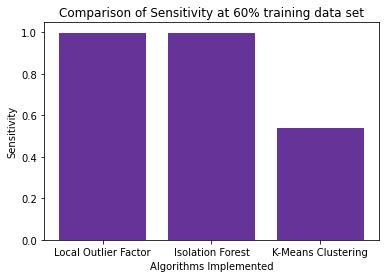

In [ ]:
sens60 = [lofsens60, isfsens60, gssens60]
print(colored(algo[0], attrs=['bold']), end=": ")
print(colored(sens60[0], attrs=['bold']))
print(colored(algo[1], attrs=['bold']), end=": ")
print(colored(sens60[1], attrs=['bold']))
print(colored(algo[2], attrs=['bold']), end=": ")
print(colored(sens60[2], attrs=['bold']))
plt.bar(algo, sens60, color='RebeccaPurple')
print()
plt.xlabel('Algorithms Implemented')
plt.ylabel('Sensitivity')
plt.title('Comparison of Sensitivity at 60% training data set')
plt.show()

Local Outlier Factor: 0.9983
Isolation Forest: 0.9989
K-Means Clustering: 0.539



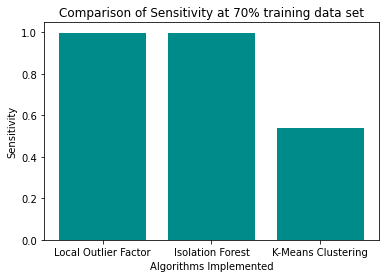

In [ ]:
sens70 = [lofsens70, isfsens70, gssens70]
print(colored(algo[0], attrs=['bold']), end=": ")
print(colored(sens70[0], attrs=['bold']))
print(colored(algo[1], attrs=['bold']), end=": ")
print(colored(sens70[1], attrs=['bold']))
print(colored(algo[2], attrs=['bold']), end=": ")
print(colored(sens70[2], attrs=['bold']))
plt.bar(algo, sens70, color='DarkCyan')
print()
plt.xlabel('Algorithms Implemented')
plt.ylabel('Sensitivity')
plt.title('Comparison of Sensitivity at 70% training data set')
plt.show()

Local Outlier Factor: 0.9983
Isolation Forest: 0.9989
K-Means Clustering: 0.5393



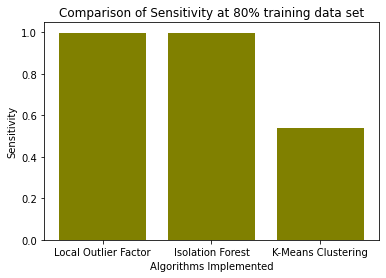

In [ ]:
sens80 = [lofsens80, isfsens80, gssens80]
print(colored(algo[0], attrs=['bold']), end=": ")
print(colored(sens80[0], attrs=['bold']))
print(colored(algo[1], attrs=['bold']), end=": ")
print(colored(sens80[1], attrs=['bold']))
print(colored(algo[2], attrs=['bold']), end=": ")
print(colored(sens80[2], attrs=['bold']))
plt.bar(algo, sens80, color='Olive')
print()
plt.xlabel('Algorithms Implemented')
plt.ylabel('Sensitivity')
plt.title('Comparison of Sensitivity at 80% training data set')
plt.show()

## Comparison of Specificity

Local Outlier Factor: 0.0376
Isolation Forest: 0.3011
K-Means Clustering: 0.3763



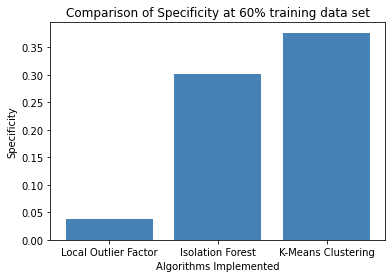

In [ ]:
spec60 = [lofspec60, isfspec60, gsspec60]
print(colored(algo[0], attrs=['bold']), end=": ")
print(colored(spec60[0], attrs=['bold']))
print(colored(algo[1], attrs=['bold']), end=": ")
print(colored(spec60[1], attrs=['bold']))
print(colored(algo[2], attrs=['bold']), end=": ")
print(colored(spec60[2], attrs=['bold']))
plt.bar(algo, spec60, color='SteelBlue')
print()
plt.xlabel('Algorithms Implemented')
plt.ylabel('Specificity')
plt.title('Comparison of Specificity at 60% training data set')
plt.show()

Local Outlier Factor: 0.037
Isolation Forest: 0.3259
K-Means Clustering: 0.3852



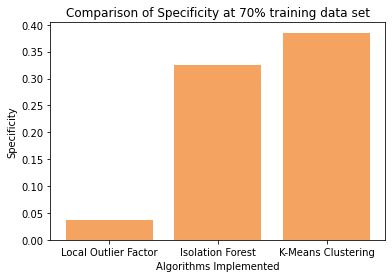

In [ ]:
spec70 = [lofspec70, isfspec70, gsspec70]
print(colored(algo[0], attrs=['bold']), end=": ")
print(colored(spec70[0], attrs=['bold']))
print(colored(algo[1], attrs=['bold']), end=": ")
print(colored(spec70[1], attrs=['bold']))
print(colored(algo[2], attrs=['bold']), end=": ")
print(colored(spec70[2], attrs=['bold']))
plt.bar(algo, spec70, color='SandyBrown')
print()
plt.xlabel('Algorithms Implemented')
plt.ylabel('Specificity')
plt.title('Comparison of Specificity at 70% training data set')
plt.show()

Local Outlier Factor: 0.023
Isolation Forest: 0.3448
K-Means Clustering: 0.3563



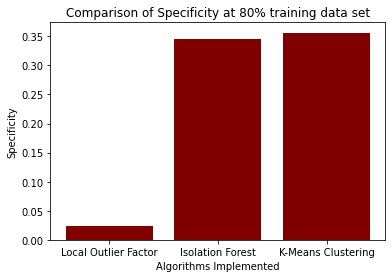

In [ ]:
spec80 = [lofspec80, isfspec80, gsspec80]
print(colored(algo[0], attrs=['bold']), end=": ")
print(colored(spec80[0], attrs=['bold']))
print(colored(algo[1], attrs=['bold']), end=": ")
print(colored(spec80[1], attrs=['bold']))
print(colored(algo[2], attrs=['bold']), end=": ")
print(colored(spec80[2], attrs=['bold']))
plt.bar(algo, spec80, color='Maroon')
print()
plt.xlabel('Algorithms Implemented')
plt.ylabel('Specificity')
plt.title('Comparison of Specificity at 80% training data set')
plt.show()

## Comparing between the algorithms

In [ ]:
def calc(auc1, auc2, auc3):
  li = [auc1, auc2, auc3]
  mx = max(li)
  if mx == auc1:
    ans = 'LOCAL OUTLIER FACTOR'
  elif mx == auc2:
    ans = 'ISOLATION FOREST'
  else:
    ans = 'K-MEANS CLUSTERING'    
  return ans 

In [ ]:
import plotly.graph_objects as go


ans60 = calc(lofauc60, isfauc60, gsauc60)
ans70 = calc(lofauc70, isfauc70, gsauc70)
ans80 = calc(lofauc80, isfauc80, gsauc80)


fig = go.Figure(data=[go.Table(header=dict(values=['<b>MODEL</b>','<b>TRAIN: 60%, TEST: 40%</b>', '<b>TRAIN: 70%, TEST: 30%</b>', '<b>TRAIN: 80%, TEST: 20%</b>'], fill_color='grey',font=dict(color='white', size=14)),
                 cells=dict(values=[['LOCAL OUTLIER FACTOR',' ',' ',' ',' ',' ',' ', 'ISOLATION FOREST', ' ','',' ',' ',' ',' ', 'K-MEANS CLUSTERING', ' ', '','','','','', 'RECOMMENDED ALGORITHM',''], 
                                    ['ACCURACY: {0:.4f}\n'.format(lofacc60 * 100), 'AUCPRC: {0:.4f}\n'.format(lofauc60),'MCC: {0:.4f}\n'.format(lofMCC60),'Sensitivity: {0:.4f}\n'.format(lofsens60),'Specificity: {0:.4f}\n'.format(lofspec60),'BCR: {0:.4f}\n'.format(lofBCR60),'', 'ACCURACY: {0:.4f}\n'.format(isfacc60 * 100), 'AUCPRC: {0:.4f}\n'.format(isfauc60),'MCC: {0:.4f}\n'.format(isfMCC60),'Sensitivity: {0:.4f}\n'.format(isfsens60),'Specificity: {0:.4f}\n'.format(isfspec60),'BCR: {0:.4f}\n'.format(isfBCR60),'', 'ACCURACY: {0:.4f}\n'.format(gsacc60 * 100), 'AUCPRC: {0:.4f}\n'.format(gsauc60),'MCC: {0:.4f}\n'.format(gsMCC60),'Sensitivity: {0:.4f}\n'.format(gssens60),'Specificity: {0:.4f}\n'.format(gsspec60),'BCR: {0:.4f}\n'.format(gsBCR60), '', ans60],
                                    ['ACCURACY: {0:.4f}\n'.format(lofacc70 * 100), 'AUCPRC: {0:.4f}\n'.format(lofauc70),'MCC: {0:.4f}\n'.format(lofMCC70),'Sensitivity: {0:.4f}\n'.format(lofsens70),'Specificity: {0:.4f}\n'.format(lofspec70),'BCR: {0:.4f}\n'.format(lofBCR70),'', 'ACCURACY: {0:.4f}\n'.format(isfacc70 * 100), 'AUCPRC: {0:.4f}\n'.format(isfauc70),'MCC: {0:.4f}\n'.format(isfMCC70),'Sensitivity: {0:.4f}\n'.format(isfsens70),'Specificity: {0:.4f}\n'.format(isfspec70),'BCR: {0:.4f}\n'.format(isfBCR70),'', 'ACCURACY: {0:.4f}\n'.format(gsacc70 * 100), 'AUCPRC: {0:.4f}\n'.format(gsauc70),'MCC: {0:.4f}\n'.format(gsMCC70),'Sensitivity: {0:.4f}\n'.format(gssens70),'Specificity: {0:.4f}\n'.format(gsspec70),'BCR: {0:.4f}\n'.format(gsBCR70), '', ans70],
                                    ['ACCURACY: {0:.4f}\n'.format(lofacc80 * 100), 'AUCPRC: {0:.4f}\n'.format(lofauc80),'MCC: {0:.4f}\n'.format(lofMCC80),'Sensitivity: {0:.4f}\n'.format(lofsens80),'Specificity: {0:.4f}\n'.format(lofspec80),'BCR: {0:.4f}\n'.format(lofBCR80),'', 'ACCURACY: {0:.4f}\n'.format(isfacc80 * 100), 'AUCPRC: {0:.4f}\n'.format(isfauc80),'MCC: {0:.4f}\n'.format(isfMCC80),'Sensitivity: {0:.4f}\n'.format(isfsens80),'Specificity: {0:.4f}\n'.format(isfspec80),'BCR: {0:.4f}\n'.format(isfBCR80),'', 'ACCURACY: {0:.4f}\n'.format(gsacc80 * 100), 'AUCPRC: {0:.4f}\n'.format(gsauc80),'MCC: {0:.4f}\n'.format(gsMCC80),'Sensitivity: {0:.4f}\n'.format(gssens80),'Specificity: {0:.4f}\n'.format(gsspec80),'BCR: {0:.4f}\n'.format(gsBCR80), '', ans80],
                                    ],fill_color='#E8E8E8',font = dict(color = 'black', size = 14)))
                     ])
fig.show()



# **Sampling the dataset**




In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.33, random_state = 2, shuffle = True, stratify = Y)
fraud = 0

for k, v in y_train.items():
  if v == 1:
    fraud += 1
print("Fraud Transactions: {}".format(fraud))
print("Valid Transactions: {}".format(len(y_train) - fraud))


Fraud Transactions: 330
Valid Transactions: 190490


## Undersampling


In [ ]:
pip install six

Fraud Transactions: 330
Valid Transactions: 330



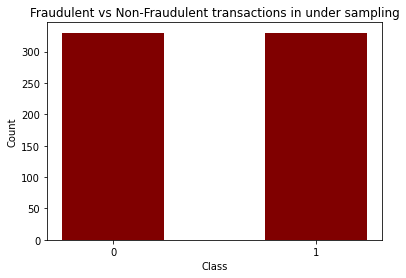

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)
x_resampled_under, y_resampled_under = rus.fit_resample(x_train, y_train)
fraud_under = 0


for v in y_resampled_under:
  if v == 1:
    fraud_under += 1

print("Fraud Transactions: {}".format(fraud_under))
print("Valid Transactions: {}".format(len(y_resampled_under) - fraud_under))
print()
fr = ['0', '1']
val = [fraud_under, len(y_resampled_under) - fraud_under]

plt.bar(fr, val, color ='maroon', width = 0.5)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Fraudulent vs Non-Fraudulent transactions in under sampling')
plt.show()


## Applying models in under sampling


In [ ]:
lof = LocalOutlierFactor(n_neighbors=20)


In [ ]:
lof.fit(x_resampled_under, y_resampled_under)
y_resampled_under_pred = lof.fit_predict(x_resampled_under) 

# Reshape the prediction values to 0 for valid, 1 for fraud. 
y_resampled_under_pred[y_resampled_under_pred == 1] = 0
y_resampled_under_pred[y_resampled_under_pred == -1] = 1

Number of errors: 321
Accuracy: 51.36363636363637
Matthews Correlation Coefficient: 0.0626



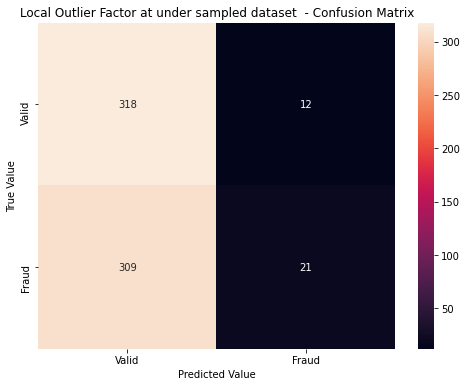


Local Outlier Factor at under sampled dataset
f1-score=0.116 auc=0.584


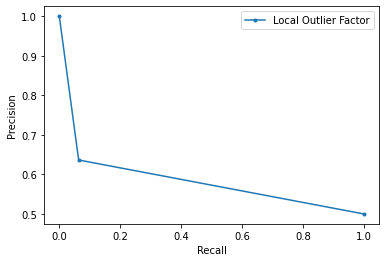

In [ ]:
import sklearn.metrics

n_errors = (y_resampled_under_pred != y_resampled_under).sum()
print(colored('Number of errors: {}'.format(n_errors), attrs=['bold']))
print(colored('Accuracy: {}'.format(accuracy_score(y_resampled_under, y_resampled_under_pred) * 100), attrs=['bold']))

# Plotting the confusion matrix 
classdict = {'normal':0, 'fraudulent':1}
lofacc = metrics.accuracy_score(y_resampled_under, y_resampled_under_pred)
labels= ['Valid', 'Fraud'] 
plt.figure(figsize=(8, 6)) 
lofcm = confusion_matrix(y_resampled_under, y_resampled_under_pred)

lofMCC = round (matthews_corrcoef(y_resampled_under, y_resampled_under_pred), 4)
print(colored('Matthews Correlation Coefficient: {}'.format(lofMCC), attrs=['bold']))
print()

sns.heatmap(lofcm, xticklabels= labels, yticklabels= labels, annot=True, fmt="")
plt.title("Local Outlier Factor at under sampled dataset  - Confusion Matrix") 
plt.ylabel('True Value') 
plt.xlabel('Predicted Value') 
plt.show()
print()

lr_precision, lr_recall, _ = precision_recall_curve(y_resampled_under, y_resampled_under_pred)
lr_f1, lr_auc = f1_score(y_resampled_under, y_resampled_under_pred), auc(lr_recall, lr_precision)

lofauc = auc(lr_recall, lr_precision)
# summarize scores
print(colored('Local Outlier Factor at under sampled dataset', attrs=['bold']))
print(colored('f1-score=%.3f auc=%.3f' % (lr_f1, lr_auc), attrs=['bold']))

plt.plot(lr_recall, lr_precision, marker='.', label='Local Outlier Factor')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()


In [ ]:
from sklearn.ensemble import IsolationForest

isf = IsolationForest(max_samples=len(x_resampled_under), random_state=1)



In [ ]:
isf.fit(x_resampled_under, y_resampled_under)
y_resampled_under_pred = isf.predict(x_resampled_under) 

# Reshape the prediction values to 0 for valid, 1 for fraud. 
y_resampled_under_pred[y_resampled_under_pred == 1] = 0
y_resampled_under_pred[y_resampled_under_pred == -1] = 1

Number of errors: 291
Accuracy: 55.90909090909091
Matthews Correlation Coefficient: 0.2344



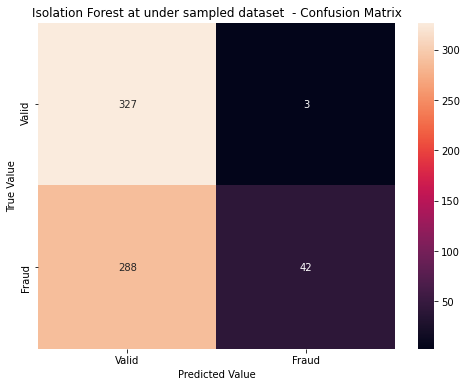


Isolation Forest at under sampled dataset
f1-score=0.224 auc=0.748


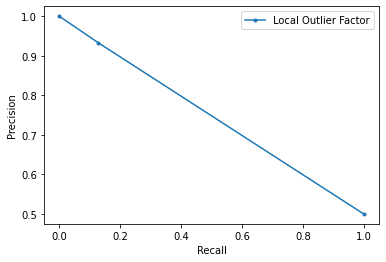

In [ ]:
import sklearn.metrics

n_errors = (y_resampled_under_pred != y_resampled_under).sum()
print(colored('Number of errors: {}'.format(n_errors), attrs=['bold']))
print(colored('Accuracy: {}'.format(accuracy_score(y_resampled_under, y_resampled_under_pred) * 100), attrs=['bold']))

# Plotting the confusion matrix 
classdict = {'normal':0, 'fraudulent':1}
isfacc = metrics.accuracy_score(y_resampled_under, y_resampled_under_pred)
labels= ['Valid', 'Fraud'] 
plt.figure(figsize=(8, 6)) 
isfcm = confusion_matrix(y_resampled_under, y_resampled_under_pred)

isfMCC = round (matthews_corrcoef(y_resampled_under, y_resampled_under_pred), 4)
print(colored('Matthews Correlation Coefficient: {}'.format(isfMCC), attrs=['bold']))
print()

sns.heatmap(isfcm, xticklabels= labels, yticklabels= labels, annot=True, fmt="")
plt.title("Isolation Forest at under sampled dataset  - Confusion Matrix") 
plt.ylabel('True Value') 
plt.xlabel('Predicted Value') 
plt.show()
print()

lr_precision, lr_recall, _ = precision_recall_curve(y_resampled_under, y_resampled_under_pred)
lr_f1, lr_auc = f1_score(y_resampled_under, y_resampled_under_pred), auc(lr_recall, lr_precision)

isfauc = auc(lr_recall, lr_precision)
# summarize scores
print(colored('Isolation Forest at under sampled dataset', attrs=['bold']))
print(colored('f1-score=%.3f auc=%.3f' % (lr_f1, lr_auc), attrs=['bold']))

plt.plot(lr_recall, lr_precision, marker='.', label='Local Outlier Factor')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()


In [ ]:
gs = KMeans(init='k-means++', n_clusters=2,random_state=0)

y_resampled_under_pred = gs.fit(x_resampled_under, y_resampled_under).predict(x_resampled_under)


Number of errors: 373
Accuracy: 43.484848484848484
Matthews Correlation Coefficient: -0.1336



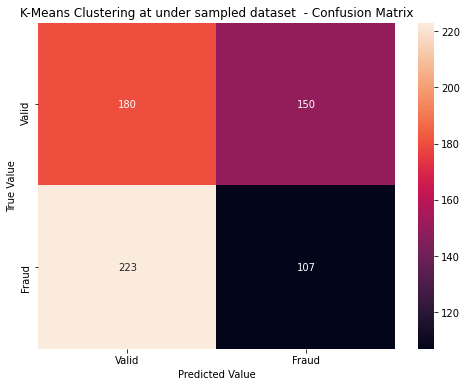


K-Means Clustering at under sampled dataset
f1-score=0.365 auc=0.539


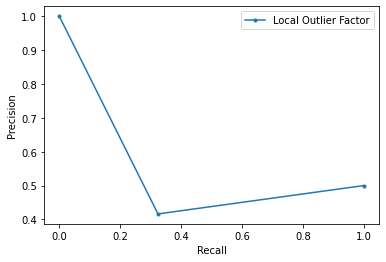

In [ ]:
import sklearn.metrics

n_errors = (y_resampled_under_pred != y_resampled_under).sum()
print(colored('Number of errors: {}'.format(n_errors), attrs=['bold']))
print(colored('Accuracy: {}'.format(accuracy_score(y_resampled_under, y_resampled_under_pred) * 100), attrs=['bold']))

# Plotting the confusion matrix 
classdict = {'normal':0, 'fraudulent':1}
gsacc = metrics.accuracy_score(y_resampled_under, y_resampled_under_pred)
labels= ['Valid', 'Fraud'] 
plt.figure(figsize=(8, 6)) 
gscm = confusion_matrix(y_resampled_under, y_resampled_under_pred)

gsMCC = round (matthews_corrcoef(y_resampled_under, y_resampled_under_pred), 4)
print(colored('Matthews Correlation Coefficient: {}'.format(gsMCC), attrs=['bold']))
print()


sns.heatmap(gscm, xticklabels= labels, yticklabels= labels, annot=True, fmt="")
plt.title("K-Means Clustering at under sampled dataset  - Confusion Matrix") 
plt.ylabel('True Value') 
plt.xlabel('Predicted Value') 
plt.show()
print()

lr_precision, lr_recall, _ = precision_recall_curve(y_resampled_under, y_resampled_under_pred)
lr_f1, lr_auc = f1_score(y_resampled_under, y_resampled_under_pred), auc(lr_recall, lr_precision)


gsauc = auc(lr_recall, lr_precision)
# summarize scores
print(colored('K-Means Clustering at under sampled dataset', attrs=['bold']))
print(colored('f1-score=%.3f auc=%.3f' % (lr_f1, lr_auc), attrs=['bold']))

plt.plot(lr_recall, lr_precision, marker='.', label='Local Outlier Factor')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()


## Comparison between performance metrics in under sampling

Local Outlier Factor: 51.36363636363637
Isolation Forest: 55.90909090909091
K-Means Clustering: 43.484848484848484



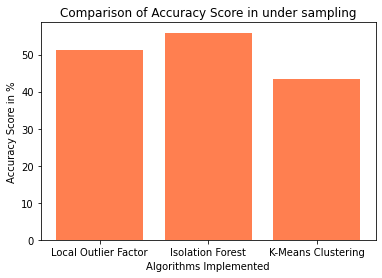

In [ ]:
algo = ['Local Outlier Factor', 'Isolation Forest', 'K-Means Clustering']
acc = [lofacc * 100, isfacc * 100, gsacc * 100]
print(colored(algo[0], attrs=['bold']), end=": ")
print(colored(acc[0], attrs=['bold']))
print(colored(algo[1], attrs=['bold']), end=": ")
print(colored(acc[1], attrs=['bold']))
print(colored(algo[2], attrs=['bold']), end=": ")
print(colored(acc[2], attrs=['bold']))
plt.bar(algo, acc, color='coral')
print()
plt.xlabel('Algorithms Implemented')
plt.ylabel('Accuracy Score in %')
plt.title('Comparison of Accuracy Score in under sampling')
plt.show()

Local Outlier Factor: 0.584090909090909
Isolation Forest: 0.7484848484848485
K-Means Clustering: 0.539231812286287



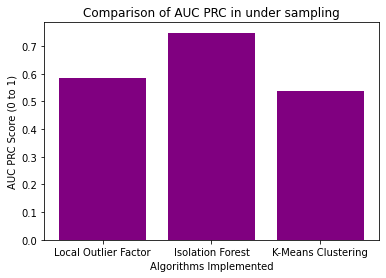

In [ ]:
aucc = [lofauc, isfauc, gsauc]
print(colored(algo[0], attrs=['bold']), end=": ")
print(colored(aucc[0], attrs=['bold']))
print(colored(algo[1], attrs=['bold']), end=": ")
print(colored(aucc[1], attrs=['bold']))
print(colored(algo[2], attrs=['bold']), end=": ")
print(colored(aucc[2], attrs=['bold']))
plt.bar(algo, aucc, color='purple')
print()
plt.xlabel('Algorithms Implemented')
plt.ylabel('AUC PRC Score (0 to 1)')
plt.title('Comparison of AUC PRC in under sampling')
plt.show()

Local Outlier Factor: 0.0626
Isolation Forest: 0.2344
K-Means Clustering: -0.1336



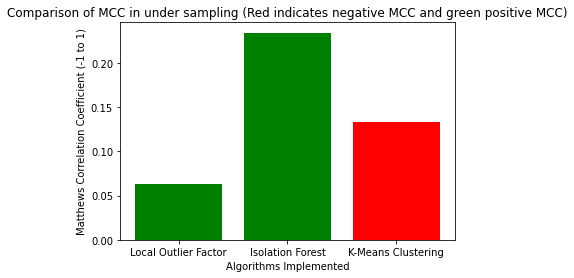

In [ ]:
mcc = [lofMCC, isfMCC, gsMCC]
print(colored(algo[0], attrs=['bold']), end=": ")
print(colored(mcc[0], attrs=['bold']))
print(colored(algo[1], attrs=['bold']), end=": ")
print(colored(mcc[1], attrs=['bold']))
print(colored(algo[2], attrs=['bold']), end=": ")
print(colored(mcc[2], attrs=['bold']))

mcc[0] = abs(mcc[0])
mcc[1] = abs(mcc[1])
mcc[2] = abs(mcc[2])
plt.bar(algo, mcc, color=['green', 'green', 'red'])
print()
plt.xlabel('Algorithms Implemented')
plt.ylabel('Matthews Correlation Coefficient (-1 to 1)')
plt.title('Comparison of MCC in under sampling (Red indicates negative MCC and green positive MCC)')
plt.show()


## Oversampling


Fraud Transactions: 190490
Valid Transactions: 190490



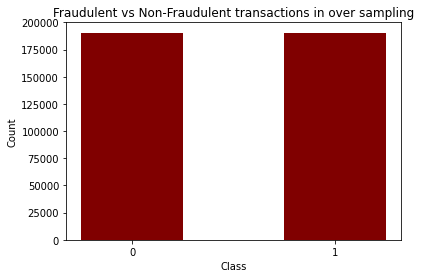

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 42)
x_resampled_over, y_resampled_over = sm.fit_sample(x_train, y_train)

fraud_over = 0


for v in y_resampled_over:
  if v == 1:
    fraud_over += 1

print("Fraud Transactions: {}".format(fraud_over))
print("Valid Transactions: {}".format(len(y_resampled_over) - fraud_over))
print()
fr = ['0', '1']
val = [fraud_over, len(y_resampled_over) - fraud_over]

plt.bar(fr, val, color ='maroon', width = 0.5)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Fraudulent vs Non-Fraudulent transactions in over sampling')
plt.show()



## Applying models in over sampling


In [ ]:
lof = LocalOutlierFactor(n_neighbors=20)


In [ ]:
lof.fit(x_resampled_over, y_resampled_over)
y_resampled_over_pred = lof.fit_predict(x_resampled_over) 

# Reshape the prediction values to 0 for valid, 1 for fraud. 
y_resampled_over_pred[y_resampled_over_pred == 1] = 0
y_resampled_over_pred[y_resampled_over_pred == -1] = 1

Number of errors: 196065
Accuracy: 48.53666859152712
Matthews Correlation Coefficient: -0.0724



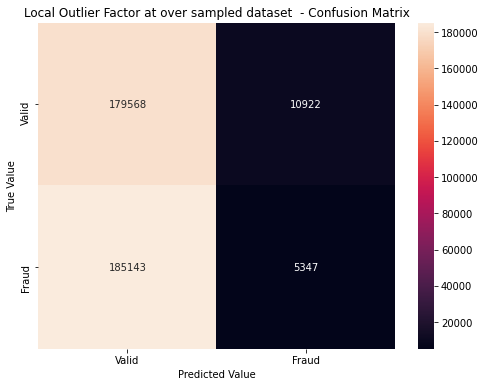


Local Outlier Factor at over sampled dataset
f1-score=0.052 auc=0.421


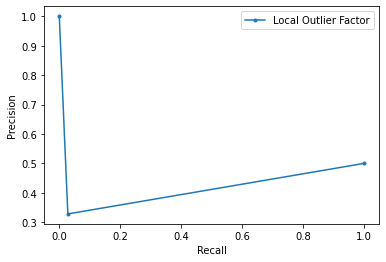

In [ ]:
import sklearn.metrics

n_errors = (y_resampled_over_pred != y_resampled_over).sum()
print(colored('Number of errors: {}'.format(n_errors), attrs=['bold']))
print(colored('Accuracy: {}'.format(accuracy_score(y_resampled_over, y_resampled_over_pred) * 100), attrs=['bold']))

# Plotting the confusion matrix 
classdict = {'normal':0, 'fraudulent':1}
lofacc = metrics.accuracy_score(y_resampled_over, y_resampled_over_pred)
labels= ['Valid', 'Fraud'] 
plt.figure(figsize=(8, 6)) 
lofcm = confusion_matrix(y_resampled_over, y_resampled_over_pred)

lofMCC = round (matthews_corrcoef(y_resampled_over, y_resampled_over_pred), 4)
print(colored('Matthews Correlation Coefficient: {}'.format(lofMCC), attrs=['bold']))
print()

sns.heatmap(lofcm, xticklabels= labels, yticklabels= labels, annot=True, fmt="")
plt.title("Local Outlier Factor at over sampled dataset  - Confusion Matrix") 
plt.ylabel('True Value') 
plt.xlabel('Predicted Value') 
plt.show()
print()

lr_precision, lr_recall, _ = precision_recall_curve(y_resampled_over, y_resampled_over_pred)
lr_f1, lr_auc = f1_score(y_resampled_over, y_resampled_over_pred), auc(lr_recall, lr_precision)

lofauc = auc(lr_recall, lr_precision)
# summarize scores
print(colored('Local Outlier Factor at over sampled dataset', attrs=['bold']))
print(colored('f1-score=%.3f auc=%.3f' % (lr_f1, lr_auc), attrs=['bold']))

plt.plot(lr_recall, lr_precision, marker='.', label='Local Outlier Factor')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()


In [ ]:
from sklearn.ensemble import IsolationForest

isf = IsolationForest(max_samples=len(x_resampled_over), random_state=1)



In [ ]:
isf.fit(x_resampled_over, y_resampled_over)
y_resampled_over_pred = isf.predict(x_resampled_over) 

# Reshape the prediction values to 0 for valid, 1 for fraud. 
y_resampled_over_pred[y_resampled_over_pred == 1] = 0
y_resampled_over_pred[y_resampled_over_pred == -1] = 1

Number of errors: 189549
Accuracy: 50.246994592892015
Matthews Correlation Coefficient: 0.0386



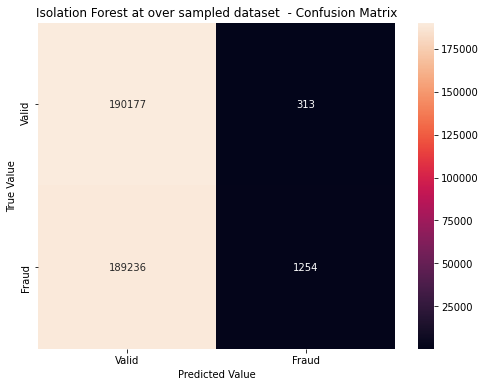


Isolation Forest at over sampled dataset
f1-score=0.013 auc=0.652


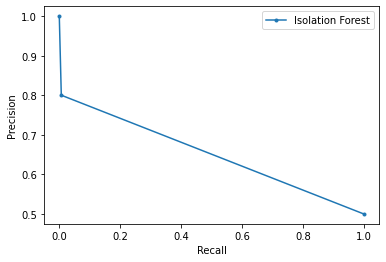

In [ ]:
import sklearn.metrics

n_errors = (y_resampled_over_pred != y_resampled_over).sum()
print(colored('Number of errors: {}'.format(n_errors), attrs=['bold']))
print(colored('Accuracy: {}'.format(accuracy_score(y_resampled_over, y_resampled_over_pred) * 100), attrs=['bold']))

# Plotting the confusion matrix 
classdict = {'normal':0, 'fraudulent':1}
isfacc = metrics.accuracy_score(y_resampled_over, y_resampled_over_pred)
labels= ['Valid', 'Fraud'] 
plt.figure(figsize=(8, 6)) 
isfcm = confusion_matrix(y_resampled_over, y_resampled_over_pred)

isfMCC = round (matthews_corrcoef(y_resampled_over, y_resampled_over_pred), 4)
print(colored('Matthews Correlation Coefficient: {}'.format(isfMCC), attrs=['bold']))
print()


sns.heatmap(isfcm, xticklabels= labels, yticklabels= labels, annot=True, fmt="")
plt.title("Isolation Forest at over sampled dataset  - Confusion Matrix") 
plt.ylabel('True Value') 
plt.xlabel('Predicted Value') 
plt.show()
print()

lr_precision, lr_recall, _ = precision_recall_curve(y_resampled_over, y_resampled_over_pred)
lr_f1, lr_auc = f1_score(y_resampled_over, y_resampled_over_pred), auc(lr_recall, lr_precision)

isfauc = auc(lr_recall, lr_precision)
# summarize scores
print(colored('Isolation Forest at over sampled dataset', attrs=['bold']))
print(colored('f1-score=%.3f auc=%.3f' % (lr_f1, lr_auc), attrs=['bold']))

plt.plot(lr_recall, lr_precision, marker='.', label='Isolation Forest')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()



In [ ]:
gs = KMeans(init='k-means++', n_clusters=2,random_state=0)

y_resampled_over_pred = gs.fit(x_resampled_over, y_resampled_over).predict(x_resampled_over)


Number of errors: 219382
Accuracy: 42.4163998110137
Matthews Correlation Coefficient: -0.1555



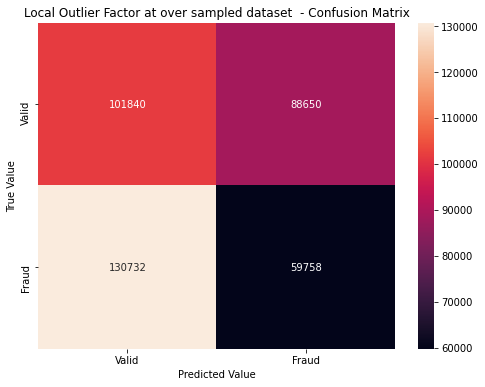


Local Outlier Factor at over sampled dataset
f1-score=0.353 auc=0.530


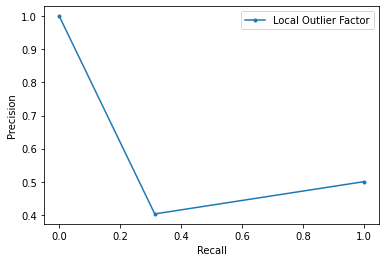

In [ ]:
import sklearn.metrics

n_errors = (y_resampled_over_pred != y_resampled_over).sum()
print(colored('Number of errors: {}'.format(n_errors), attrs=['bold']))
print(colored('Accuracy: {}'.format(accuracy_score(y_resampled_over, y_resampled_over_pred) * 100), attrs=['bold']))

# Plotting the confusion matrix 
classdict = {'normal':0, 'fraudulent':1}
gsacc = metrics.accuracy_score(y_resampled_over, y_resampled_over_pred)
labels= ['Valid', 'Fraud'] 
plt.figure(figsize=(8, 6)) 
gscm = confusion_matrix(y_resampled_over, y_resampled_over_pred)

gsMCC = round (matthews_corrcoef(y_resampled_over, y_resampled_over_pred), 4)
print(colored('Matthews Correlation Coefficient: {}'.format(gsMCC), attrs=['bold']))
print()


sns.heatmap(gscm, xticklabels= labels, yticklabels= labels, annot=True, fmt="")
plt.title("Local Outlier Factor at over sampled dataset  - Confusion Matrix") 
plt.ylabel('True Value') 
plt.xlabel('Predicted Value') 
plt.show()
print()

lr_precision, lr_recall, _ = precision_recall_curve(y_resampled_over, y_resampled_over_pred)
lr_f1, lr_auc = f1_score(y_resampled_over, y_resampled_over_pred), auc(lr_recall, lr_precision)

gsauc = auc(lr_recall, lr_precision)
# summarize scores
print(colored('Local Outlier Factor at over sampled dataset', attrs=['bold']))
print(colored('f1-score=%.3f auc=%.3f' % (lr_f1, lr_auc), attrs=['bold']))

plt.plot(lr_recall, lr_precision, marker='.', label='Local Outlier Factor')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()



## Comparison between performance metrics in over sampling

Local Outlier Factor: 48.53666859152712
Isolation Forest: 50.246994592892015
K-Means Clustering: 42.4163998110137



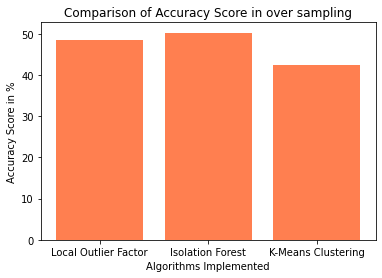

In [ ]:
acc = [lofacc * 100, isfacc * 100, gsacc * 100]
print(colored(algo[0], attrs=['bold']), end=": ")
print(colored(acc[0], attrs=['bold']))
print(colored(algo[1], attrs=['bold']), end=": ")
print(colored(acc[1], attrs=['bold']))
print(colored(algo[2], attrs=['bold']), end=": ")
print(colored(acc[2], attrs=['bold']))
plt.bar(algo, acc, color='coral')
print()
plt.xlabel('Algorithms Implemented')
plt.ylabel('Accuracy Score in %')
plt.title('Comparison of Accuracy Score in over sampling')
plt.show()

Local Outlier Factor: 0.4213483648726266
Isolation Forest: 0.6517733881013474
K-Means Clustering: 0.529756806039869



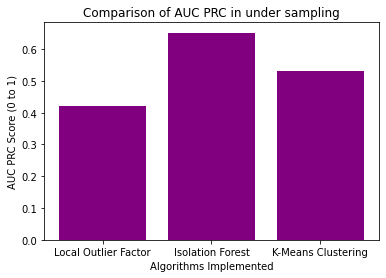

In [ ]:
aucc = [lofauc, isfauc, gsauc]
print(colored(algo[0], attrs=['bold']), end=": ")
print(colored(aucc[0], attrs=['bold']))
print(colored(algo[1], attrs=['bold']), end=": ")
print(colored(aucc[1], attrs=['bold']))
print(colored(algo[2], attrs=['bold']), end=": ")
print(colored(aucc[2], attrs=['bold']))
plt.bar(algo, aucc, color='purple')
print()
plt.xlabel('Algorithms Implemented')
plt.ylabel('AUC PRC Score (0 to 1)')
plt.title('Comparison of AUC PRC in under sampling')
plt.show()

Local Outlier Factor: -0.0724
Isolation Forest: 0.0386
K-Means Clustering: -0.1555



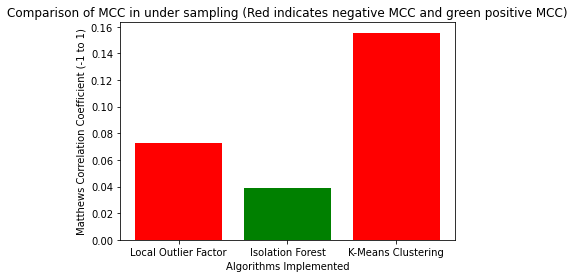

In [ ]:
mcc = [lofMCC, isfMCC, gsMCC]
print(colored(algo[0], attrs=['bold']), end=": ")
print(colored(mcc[0], attrs=['bold']))
print(colored(algo[1], attrs=['bold']), end=": ")
print(colored(mcc[1], attrs=['bold']))
print(colored(algo[2], attrs=['bold']), end=": ")
print(colored(mcc[2], attrs=['bold']))

mcc[0] = abs(mcc[0])
mcc[1] = abs(mcc[1])
mcc[2] = abs(mcc[2])
plt.bar(algo, mcc, color=['red', 'green', 'red'])
print()
plt.xlabel('Algorithms Implemented')
plt.ylabel('Matthews Correlation Coefficient (-1 to 1)')
plt.title('Comparison of MCC in under sampling (Red indicates negative MCC and green positive MCC)')
plt.show()


## K-Fold Cross Validation

In [ ]:
from sklearn.model_selection import KFold
kf = KFold()
from sklearn.model_selection import cross_val_score
x, xt, y, yt = train_test_split(X, Y, train_size=0.8, random_state=1)

In [ ]:
from sklearn.model_selection import cross_validate
import statistics as st
lof = LocalOutlierFactor(n_neighbors=20, contamination=Outlier_fraction)
isf = IsolationForest(max_samples=len(x), contamination=Outlier_fraction)
gs = KMeans(init='k-means++', n_clusters=2,random_state=0)
aucli = [0.0] * 5
sensli = [0.0] * 5
specli = [0.0] * 5
mccli = [0.0] * 5
accli = [0.0] * 5
accli.clear()
aucli.clear()
mccli.clear()
sensli.clear()
specli.clear()
sensli.clear()
print(x.shape)
print(y.shape)


(227845, 30)
(227845,)


In [ ]:
for result in kf.split(x):
  xtrain = x.iloc[result[0]]
  xtest =  x.iloc[result[1]]
  ytrain = y.iloc[result[0]]
  ytest = y.iloc[result[1]]
  gs.fit(xtrain, ytrain)
  ypred = gs.predict(xtest)
  # ypred[ypred == 1] = 0
  # ypred[ypred == -1] = 1
  cm = confusion_matrix(ytest, ypred)
  lr_precision, lr_recall, _ = precision_recall_curve(ytest, ypred)
  accli.append(metrics.accuracy_score(ytest, ypred))
  aucli.append(metrics.auc(lr_recall, lr_precision))
  mccli.append(matthews_corrcoef(ytest, ypred))
  sensli.append(cm[0][0] / (cm[0][1] + cm[0][0]))
  specli.append(cm[1][1] / (cm[1][0] + cm[1][1]))
  print(cm)

# print(sorted(sklearn.metrics.SCORERS.keys()))
# isf.fit(xTrain80, yTrain80)
# yPred80 = isf.predict(xTest80) 

# # Reshape the prediction values to 0 for valid, 1 for fraud. 
# yPred80[yPred80 == 1] = 0
# yPred80[yPred80 == -1] = 1
 

[[20880 24612]
 [   33    44]]
[[21013 24483]
 [   22    51]]
[[21056 24411]
 [   29    73]]
[[21015 24483]
 [   22    49]]
[[24176 21311]
 [   57    25]]


In [ ]:
auc = st.mean(aucli)
mcc = st.mean(mccli)
sens = st.mean(sensli)
spec = st.mean(specli)
acc = st.mean(accli)
bcr = (sens + spec) / 2
print(acc * 100)
print(auc)
print(mcc)
print(sens)
print(spec)
print(bcr)


47.56830301301323
0.2994354831911165
0.006091540234692321
0.4754665273040381
0.5961527753551175
0.5358096513295778
